In [3]:
#import libraries
import os
import librosa
import math
from python_speech_features import mfcc
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Dense, Conv1D, Flatten, Conv2D, MaxPooling1D,MaxPool2D,Dropout,Activation, MaxPooling2D

In [ ]:
pip install python_speech_features

In [ ]:
pip install wavio

In [5]:
master_files='/content/drive/MyDrive/Colab Notebooks/MASTERTHESIS/files'

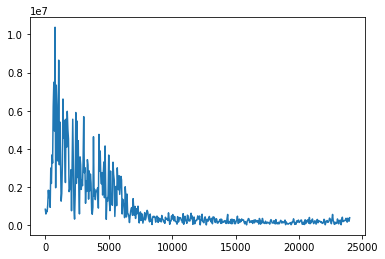

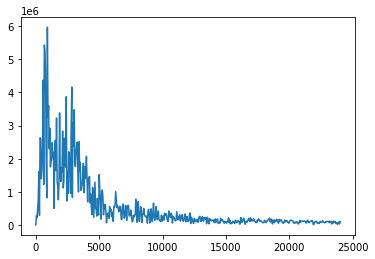

<Figure size 432x288 with 0 Axes>

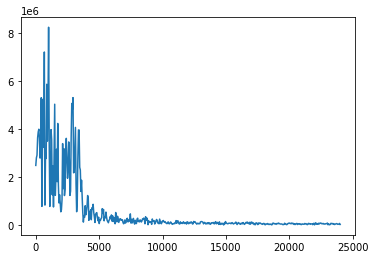

<Figure size 432x288 with 0 Axes>

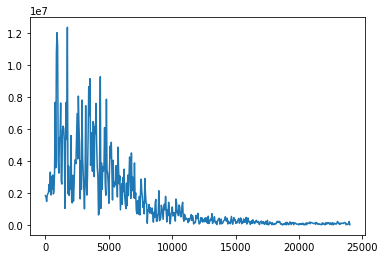

<Figure size 432x288 with 0 Axes>

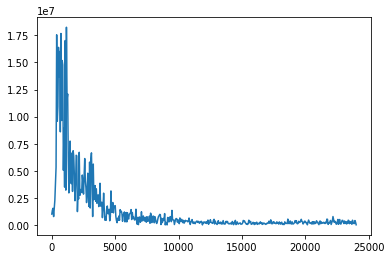

<Figure size 432x288 with 0 Axes>

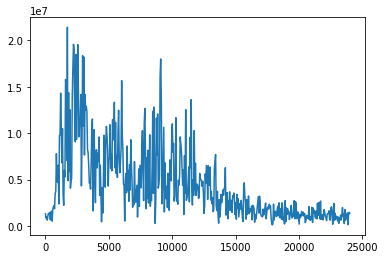

<Figure size 432x288 with 0 Axes>

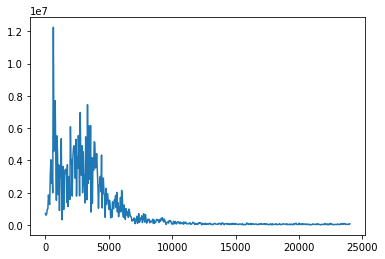

<Figure size 432x288 with 0 Axes>

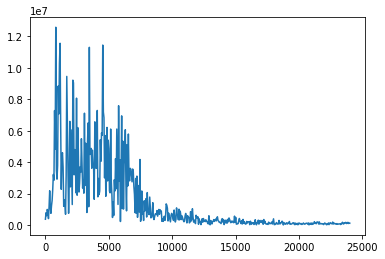

<Figure size 432x288 with 0 Axes>

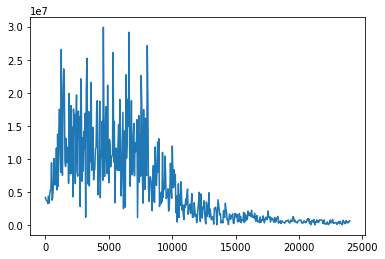

<Figure size 432x288 with 0 Axes>

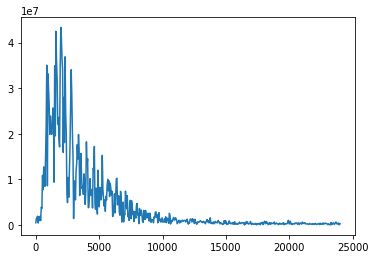

<Figure size 432x288 with 0 Axes>

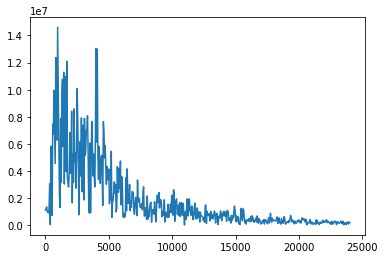

<Figure size 432x288 with 0 Axes>

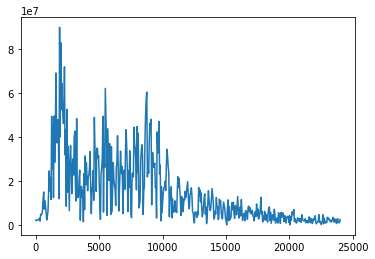

<Figure size 432x288 with 0 Axes>

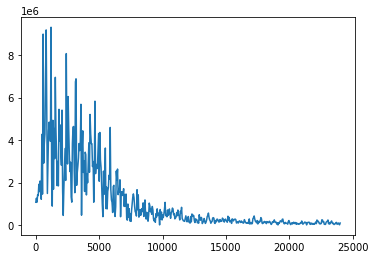

<Figure size 432x288 with 0 Axes>

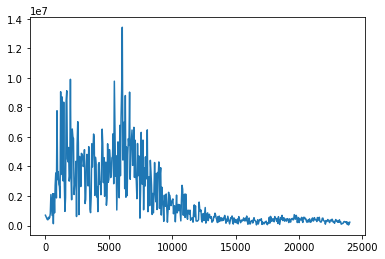

<Figure size 432x288 with 0 Axes>

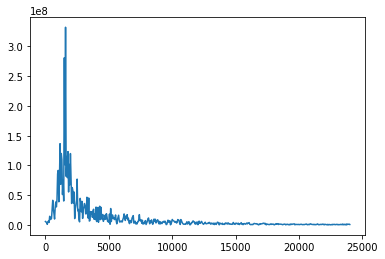

<Figure size 432x288 with 0 Axes>

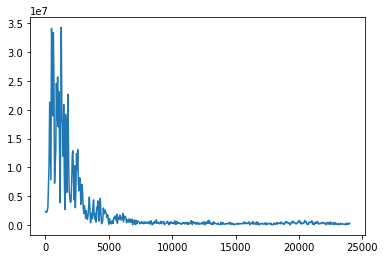

<Figure size 432x288 with 0 Axes>

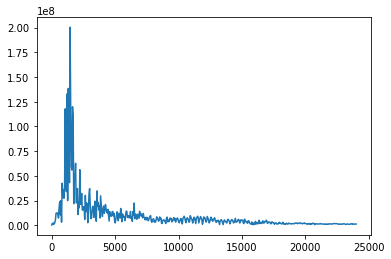

<Figure size 432x288 with 0 Axes>

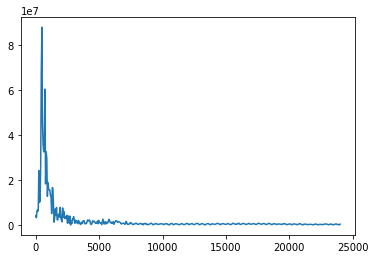

<Figure size 432x288 with 0 Axes>

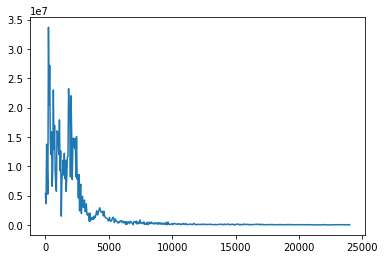

<Figure size 432x288 with 0 Axes>

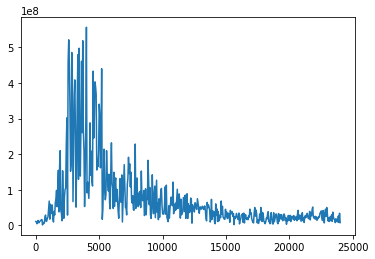

<Figure size 432x288 with 0 Axes>

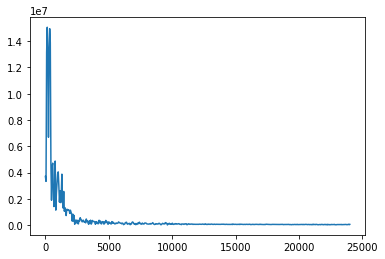

<Figure size 432x288 with 0 Axes>

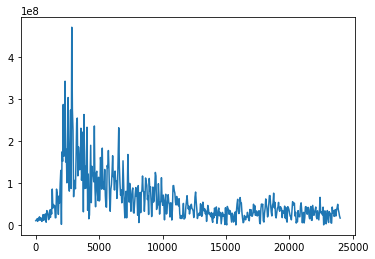

<Figure size 432x288 with 0 Axes>

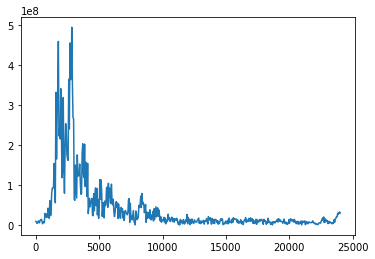

<Figure size 432x288 with 0 Axes>

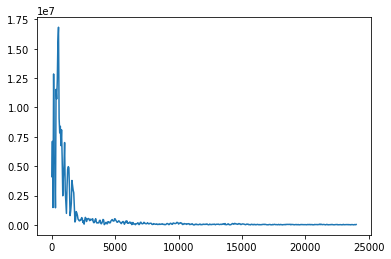

<Figure size 432x288 with 0 Axes>

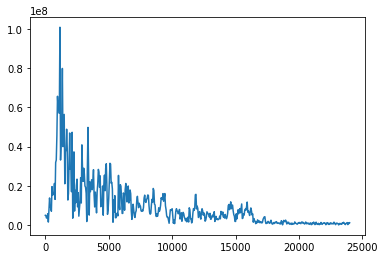

<Figure size 432x288 with 0 Axes>

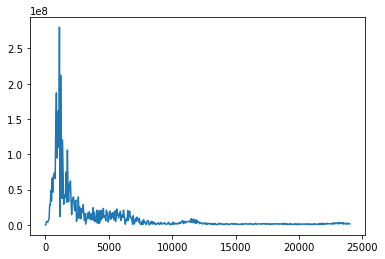

<Figure size 432x288 with 0 Axes>

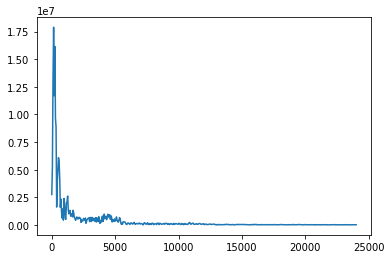

<Figure size 432x288 with 0 Axes>

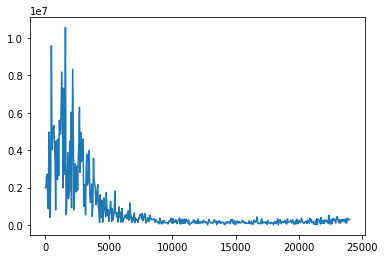

<Figure size 432x288 with 0 Axes>

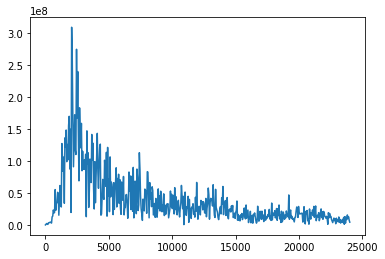

<Figure size 432x288 with 0 Axes>

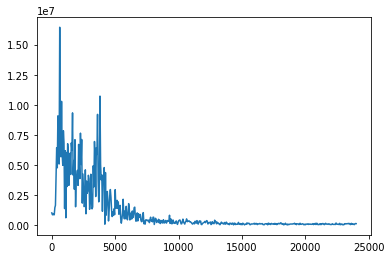

<Figure size 432x288 with 0 Axes>

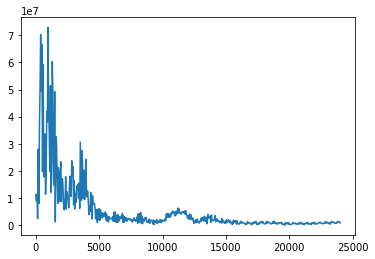

<Figure size 432x288 with 0 Axes>

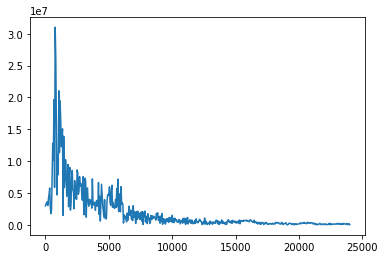

<Figure size 432x288 with 0 Axes>

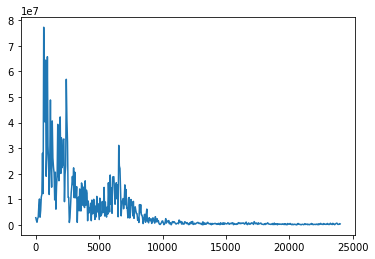

<Figure size 432x288 with 0 Axes>

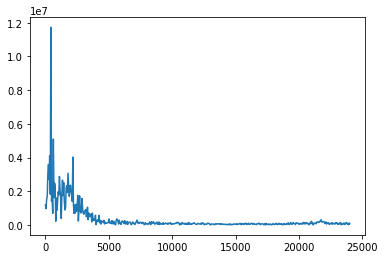

<Figure size 432x288 with 0 Axes>

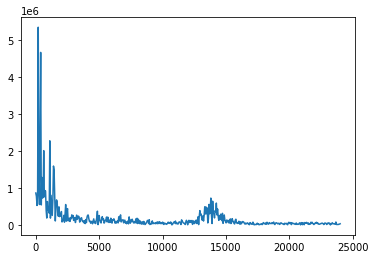

<Figure size 432x288 with 0 Axes>

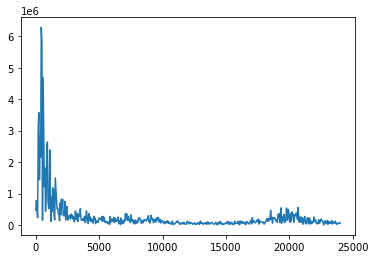

<Figure size 432x288 with 0 Axes>

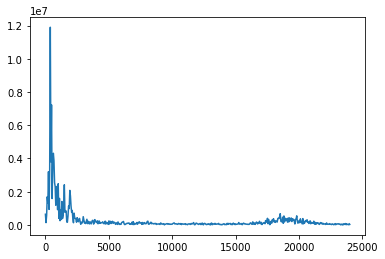

<Figure size 432x288 with 0 Axes>

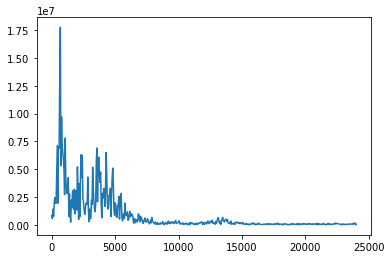

<Figure size 432x288 with 0 Axes>

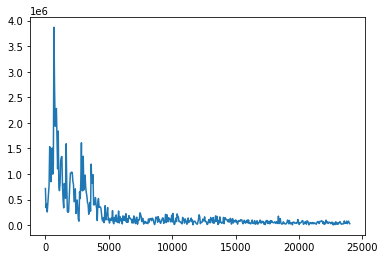

<Figure size 432x288 with 0 Axes>

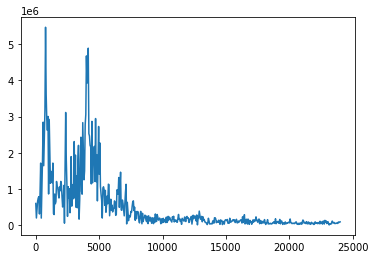

<Figure size 432x288 with 0 Axes>

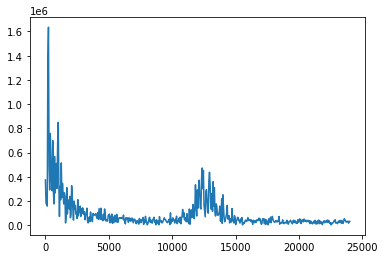

<Figure size 432x288 with 0 Axes>

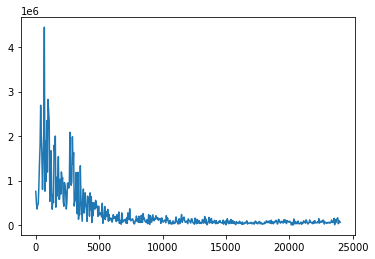

<Figure size 432x288 with 0 Axes>

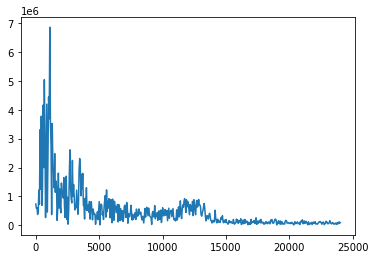

<Figure size 432x288 with 0 Axes>

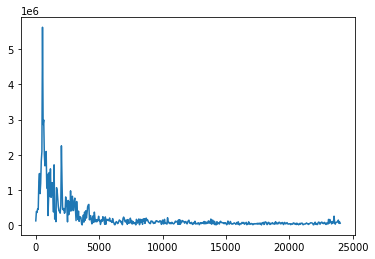

<Figure size 432x288 with 0 Axes>

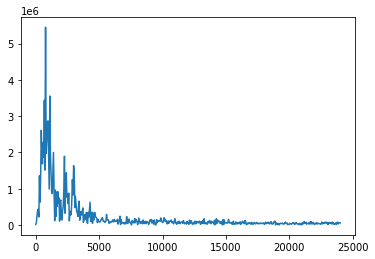

<Figure size 432x288 with 0 Axes>

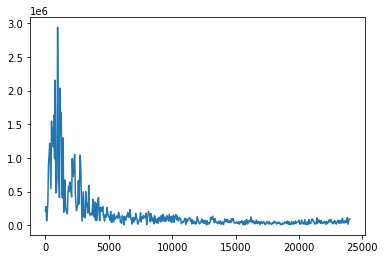

<Figure size 432x288 with 0 Axes>

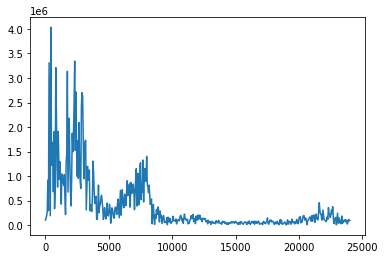

<Figure size 432x288 with 0 Axes>

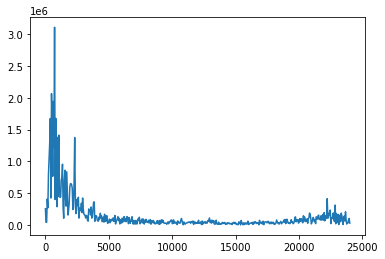

<Figure size 432x288 with 0 Axes>

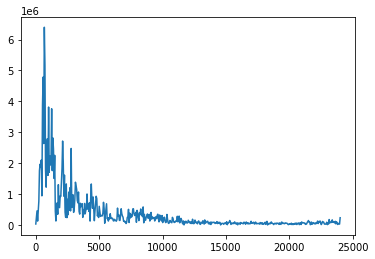

<Figure size 432x288 with 0 Axes>

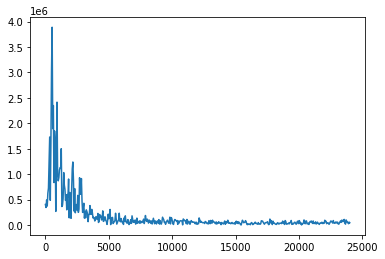

<Figure size 432x288 with 0 Axes>

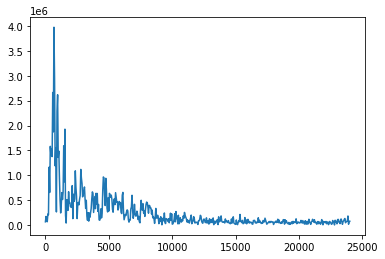

<Figure size 432x288 with 0 Axes>

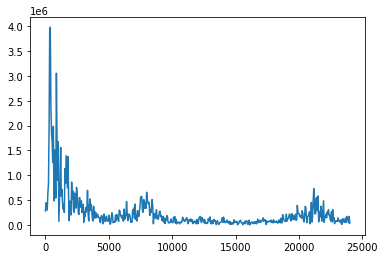

<Figure size 432x288 with 0 Axes>

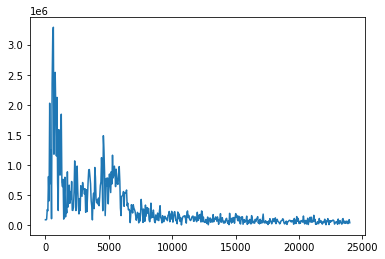

<Figure size 432x288 with 0 Axes>

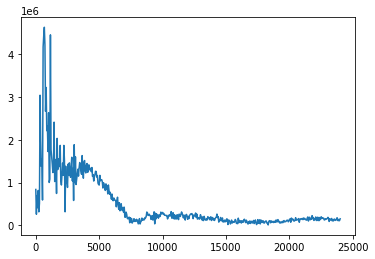

<Figure size 432x288 with 0 Axes>

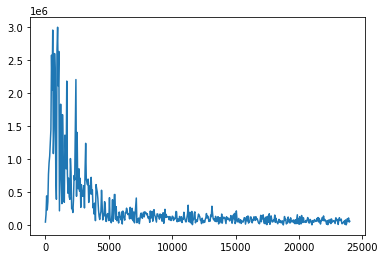

<Figure size 432x288 with 0 Axes>

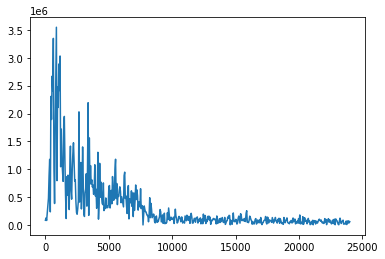

<Figure size 432x288 with 0 Axes>

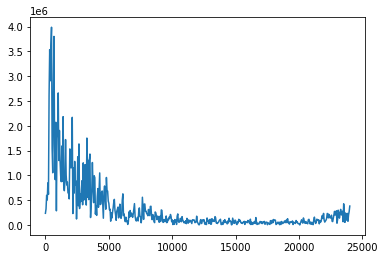

<Figure size 432x288 with 0 Axes>

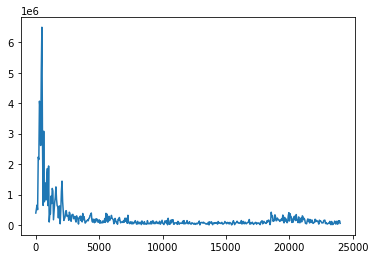

<Figure size 432x288 with 0 Axes>

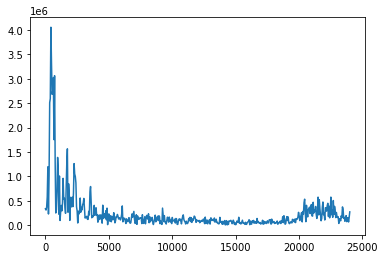

<Figure size 432x288 with 0 Axes>

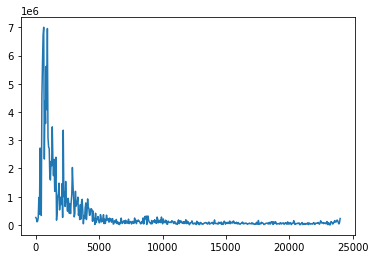

<Figure size 432x288 with 0 Axes>

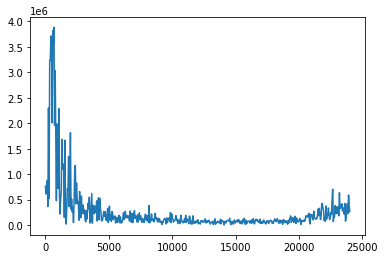

<Figure size 432x288 with 0 Axes>

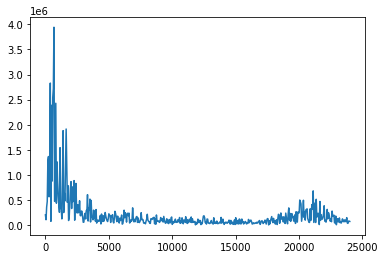

<Figure size 432x288 with 0 Axes>

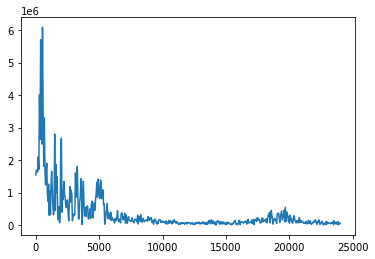

<Figure size 432x288 with 0 Axes>

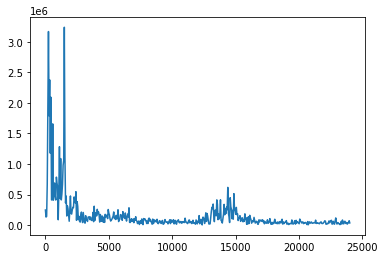

<Figure size 432x288 with 0 Axes>

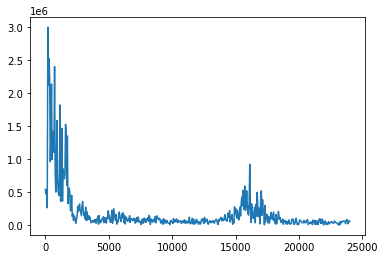

<Figure size 432x288 with 0 Axes>

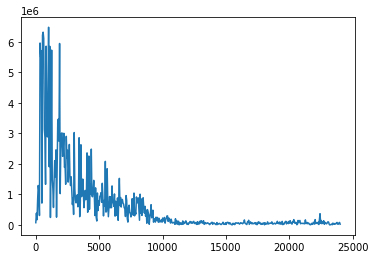

<Figure size 432x288 with 0 Axes>

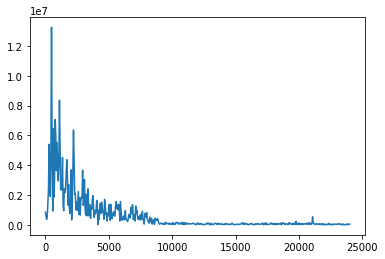

<Figure size 432x288 with 0 Axes>

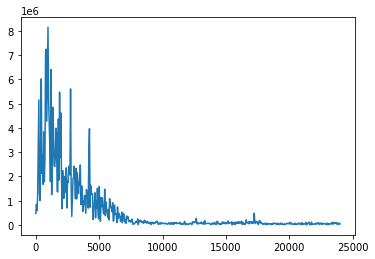

<Figure size 432x288 with 0 Axes>

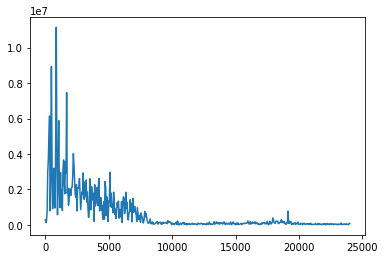

<Figure size 432x288 with 0 Axes>

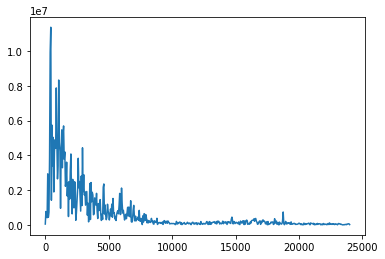

<Figure size 432x288 with 0 Axes>

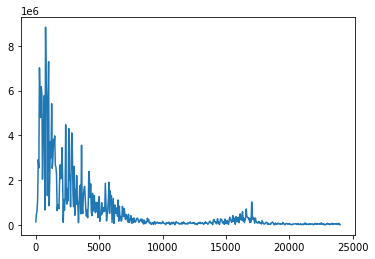

<Figure size 432x288 with 0 Axes>

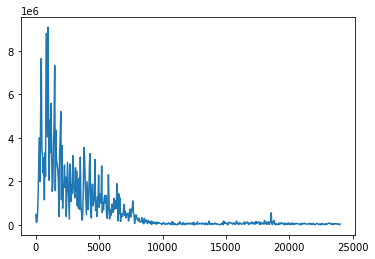

<Figure size 432x288 with 0 Axes>

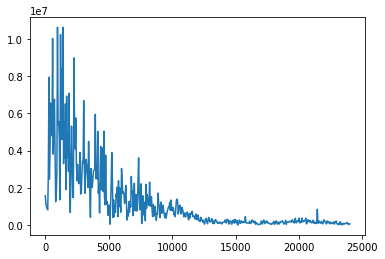

<Figure size 432x288 with 0 Axes>

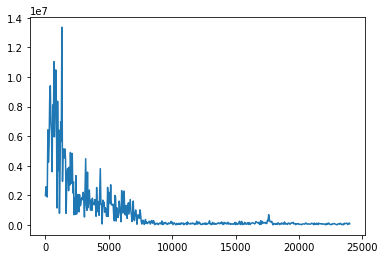

<Figure size 432x288 with 0 Axes>

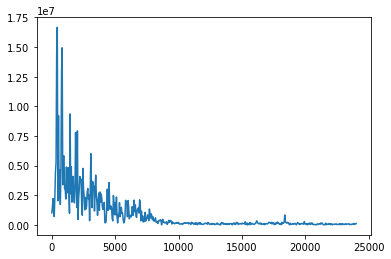

<Figure size 432x288 with 0 Axes>

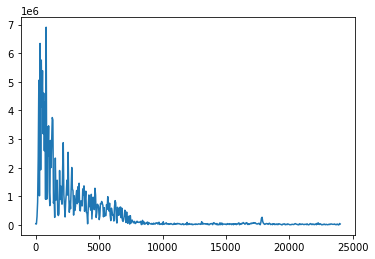

<Figure size 432x288 with 0 Axes>

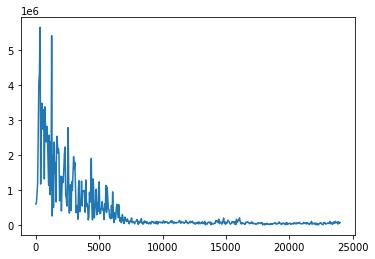

<Figure size 432x288 with 0 Axes>

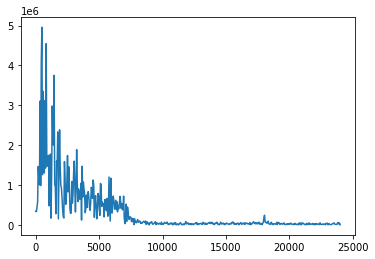

<Figure size 432x288 with 0 Axes>

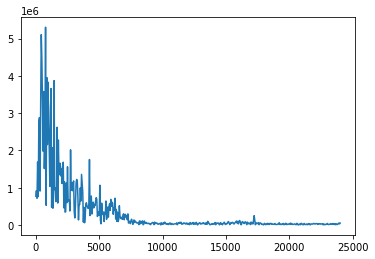

<Figure size 432x288 with 0 Axes>

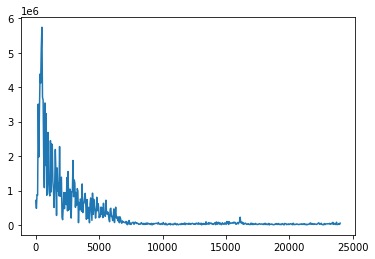

<Figure size 432x288 with 0 Axes>

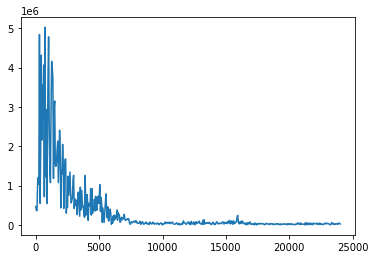

<Figure size 432x288 with 0 Axes>

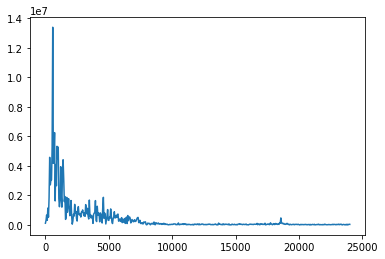

<Figure size 432x288 with 0 Axes>

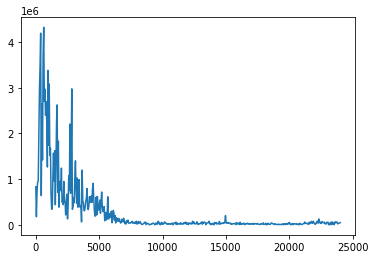

<Figure size 432x288 with 0 Axes>

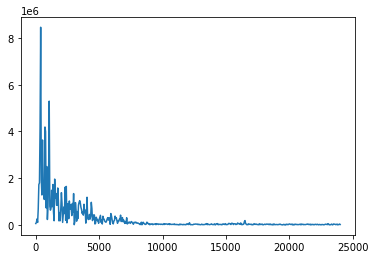

<Figure size 432x288 with 0 Axes>

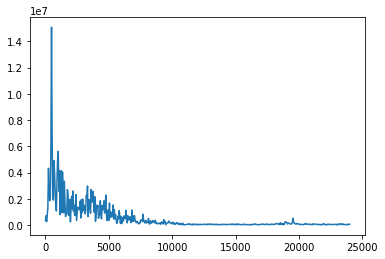

<Figure size 432x288 with 0 Axes>

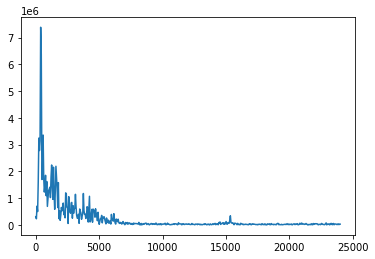

<Figure size 432x288 with 0 Axes>

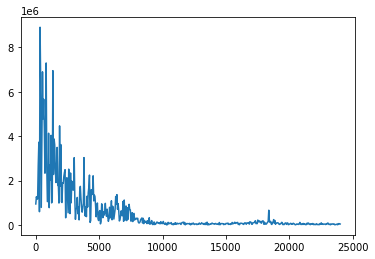

<Figure size 432x288 with 0 Axes>

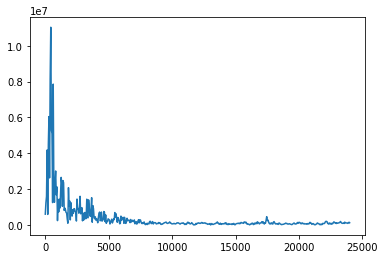

<Figure size 432x288 with 0 Axes>

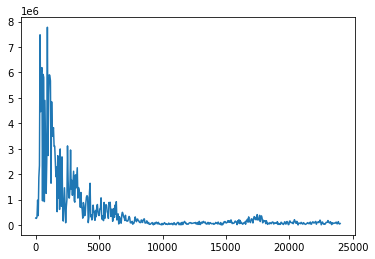

<Figure size 432x288 with 0 Axes>

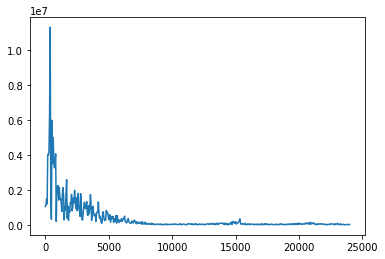

<Figure size 432x288 with 0 Axes>

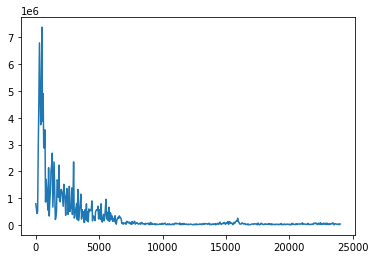

<Figure size 432x288 with 0 Axes>

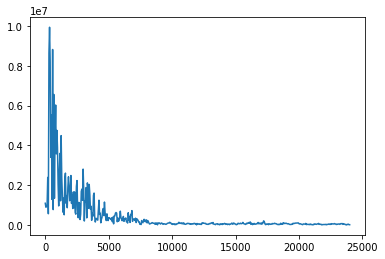

<Figure size 432x288 with 0 Axes>

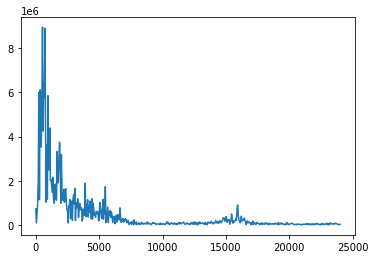

<Figure size 432x288 with 0 Axes>

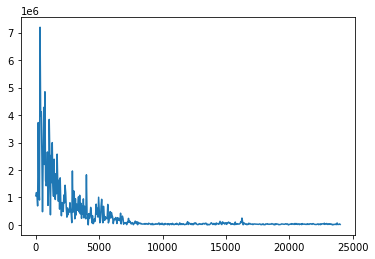

<Figure size 432x288 with 0 Axes>

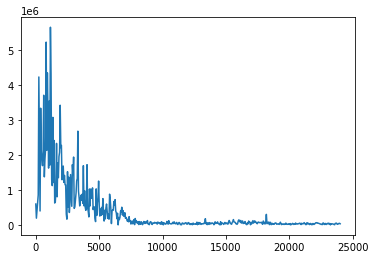

<Figure size 432x288 with 0 Axes>

In [305]:
i=0
N = 1000
for filename in os.listdir(master_files):
  if filename[0]=='N':
    i+=1
    wav=wavio.read(master_files+'/'+filename)
    sign=wav.data[:,0]
    sr=wav.rate
    T=1/sr
    yf = scipy.fftpack.fft(sign)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fig, ax = plt.subplots()
    plt.figure(i)
    ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


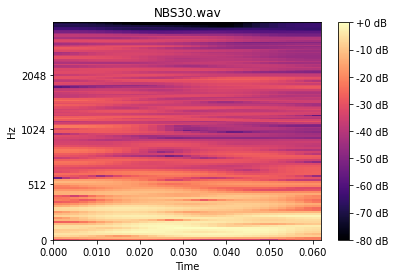

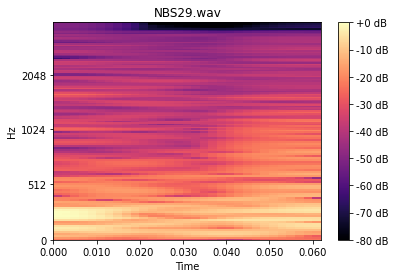

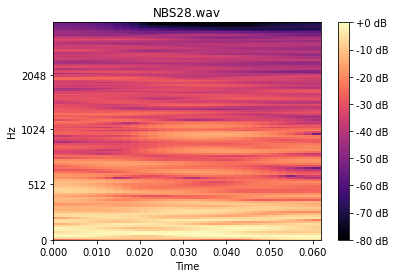

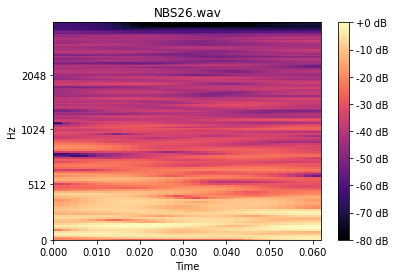

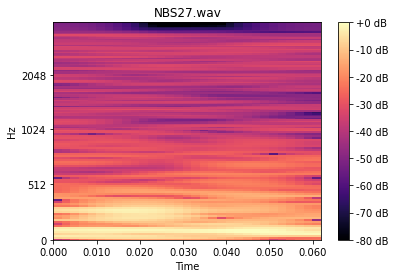

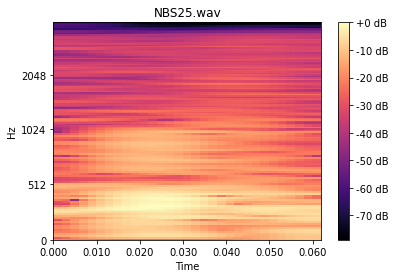

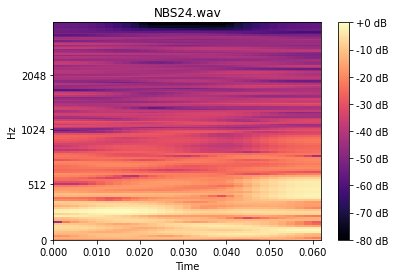

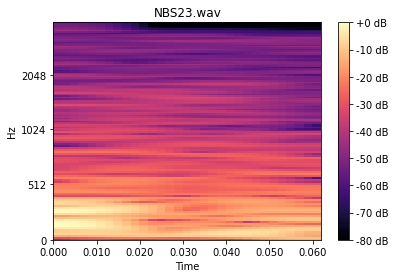

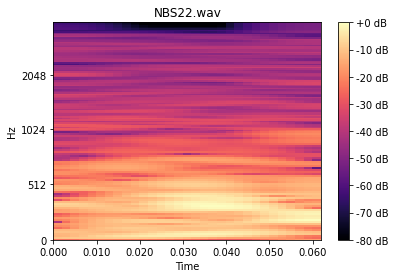

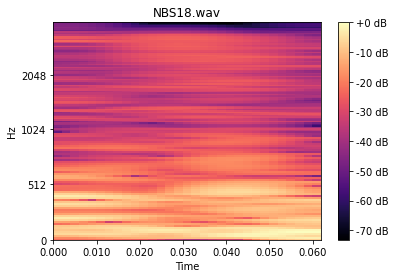

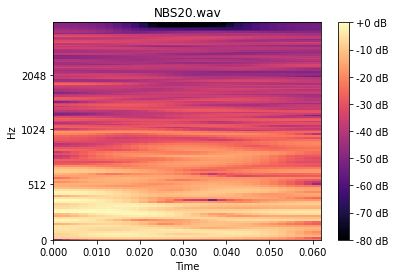

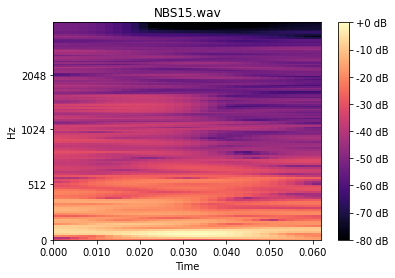

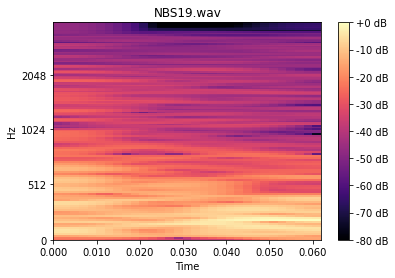

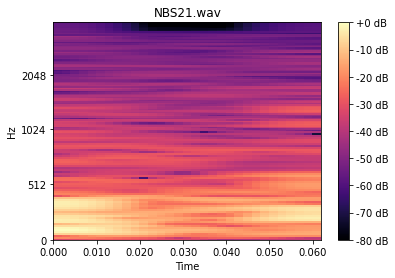

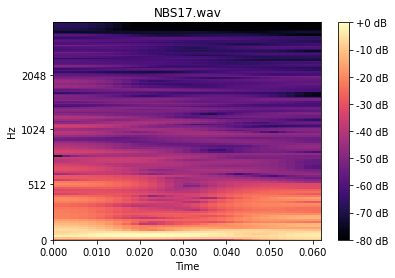

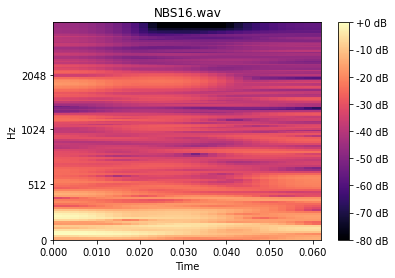

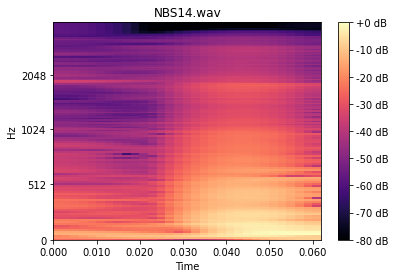

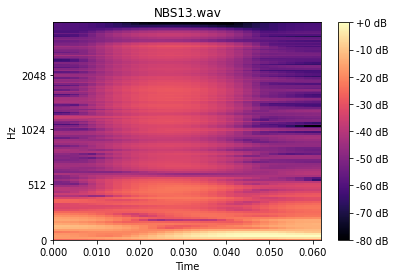

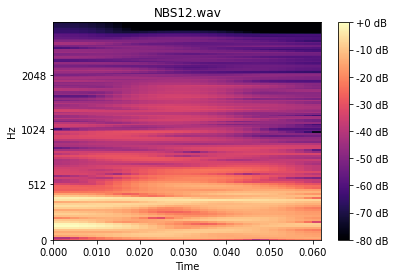

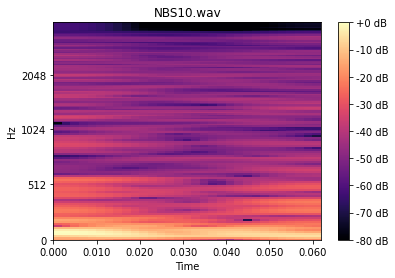

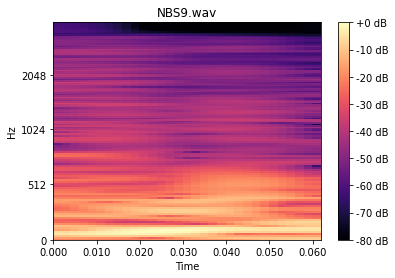

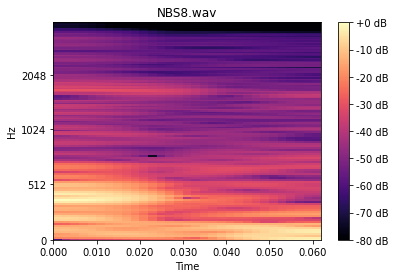

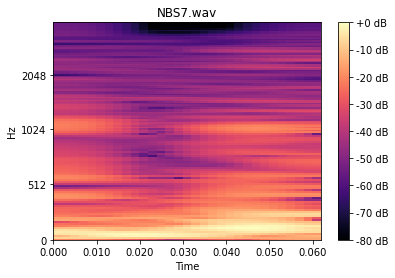

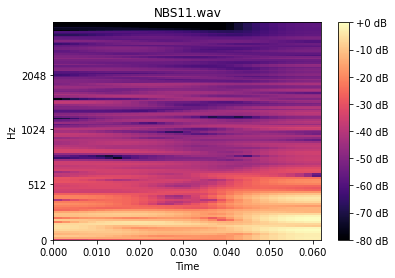

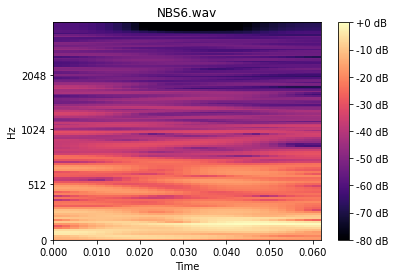

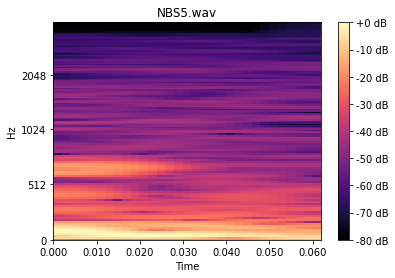

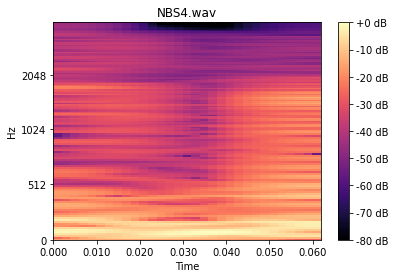

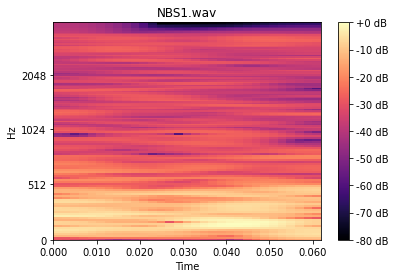

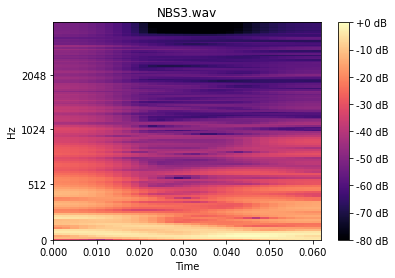

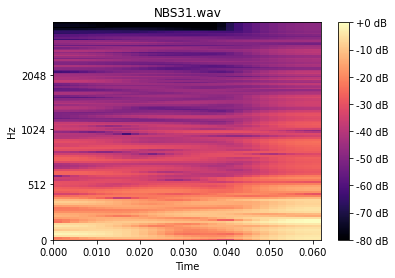

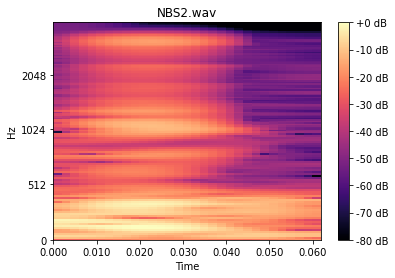

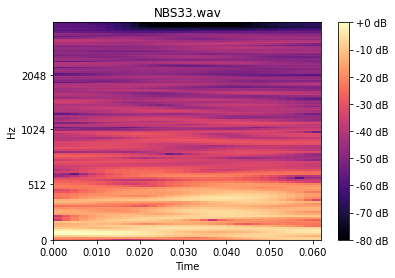

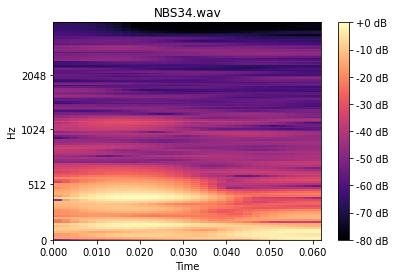

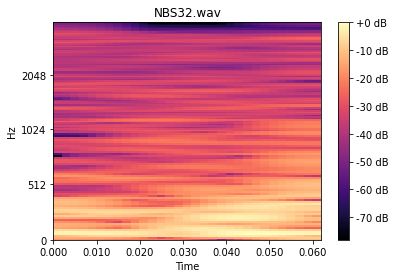

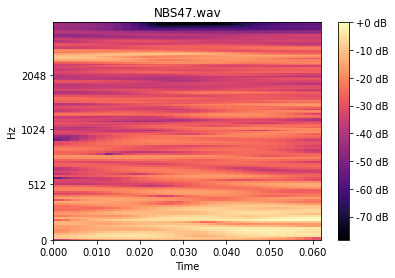

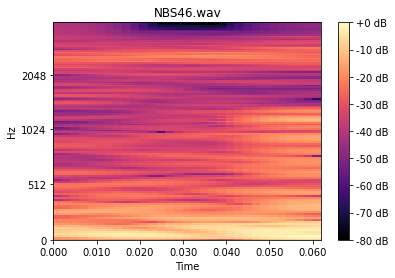

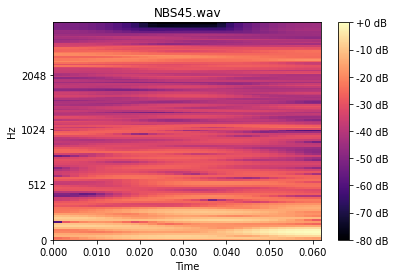

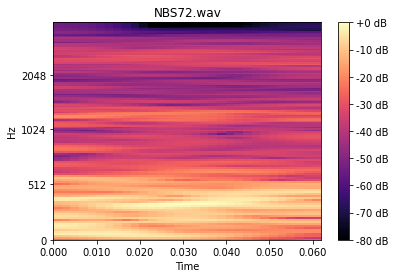

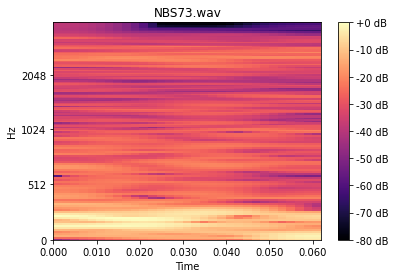

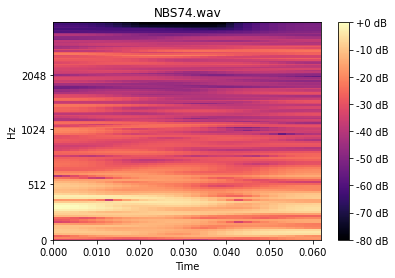

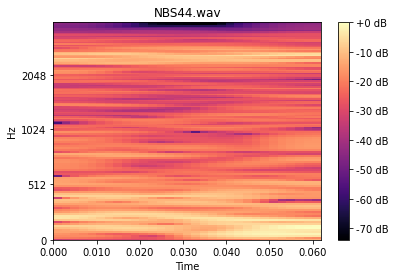

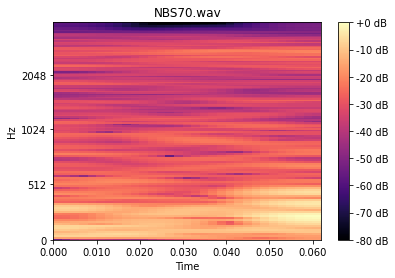

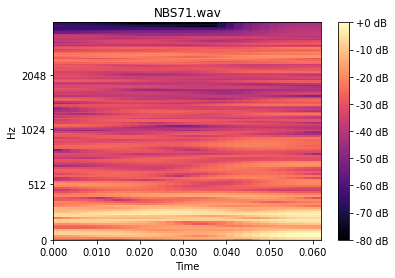

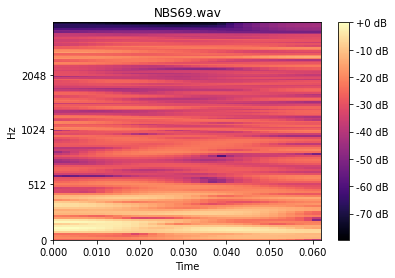

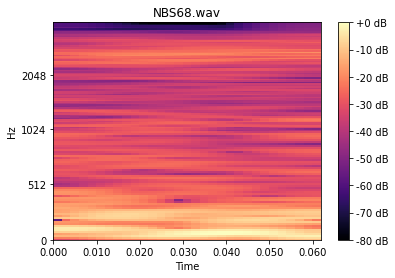

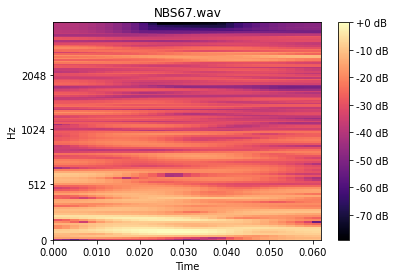

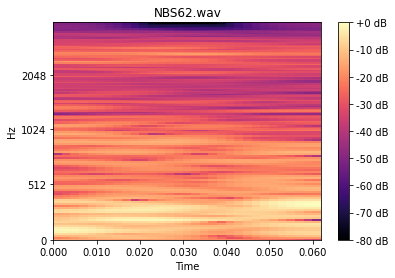

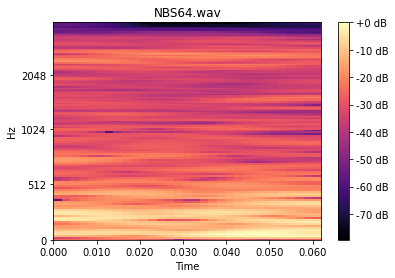

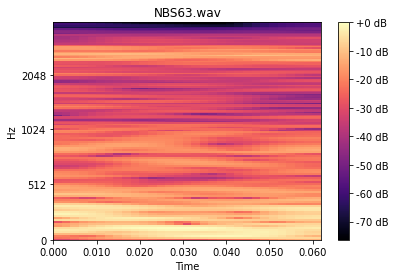

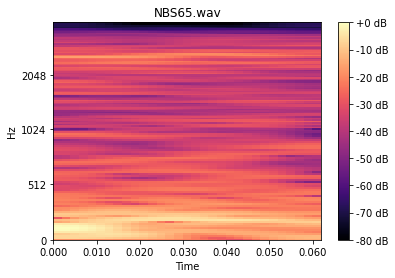

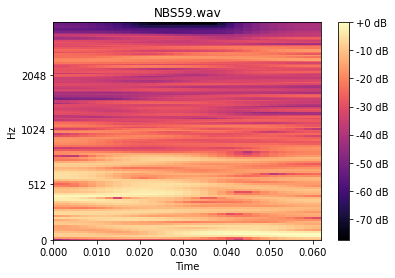

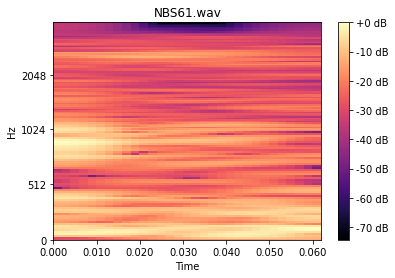

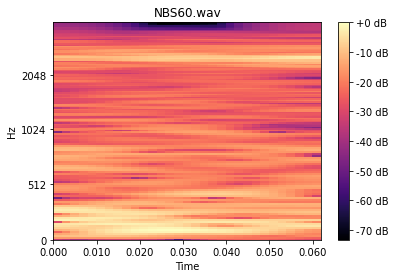

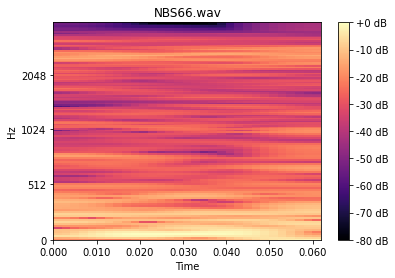

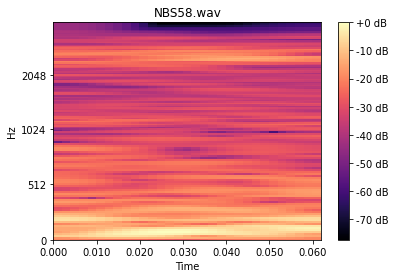

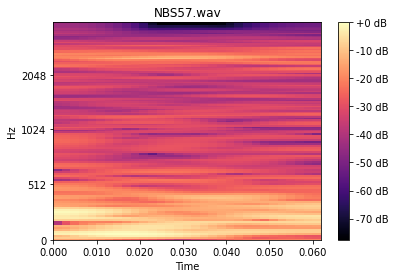

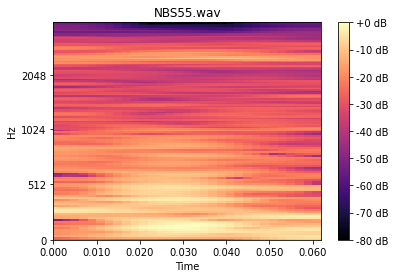

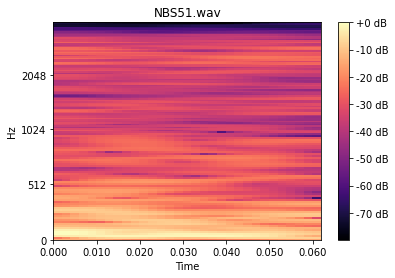

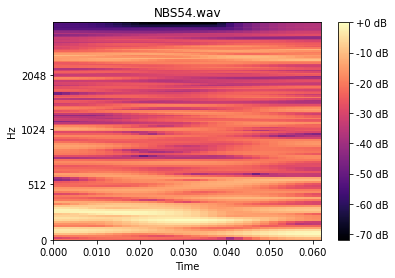

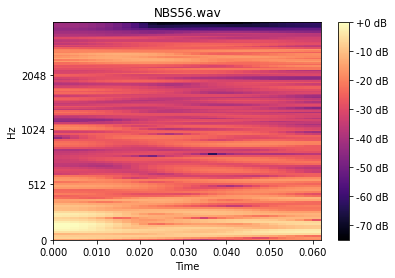

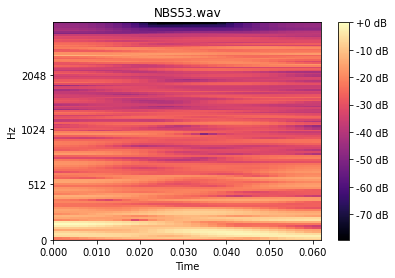

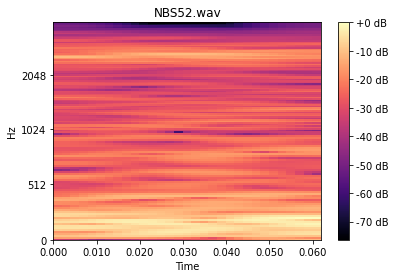

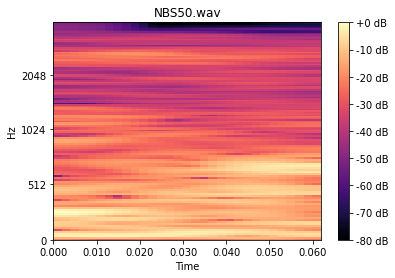

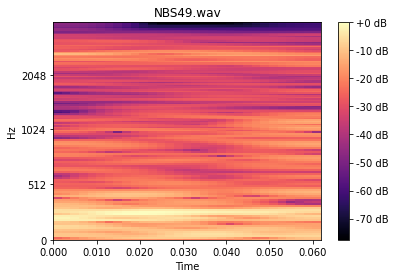

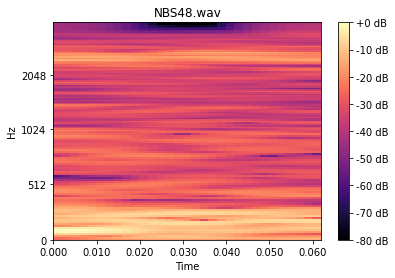

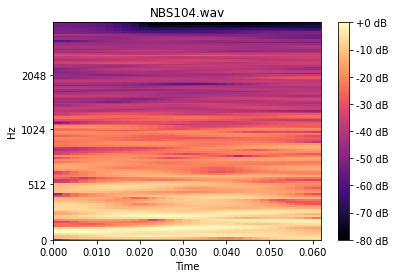

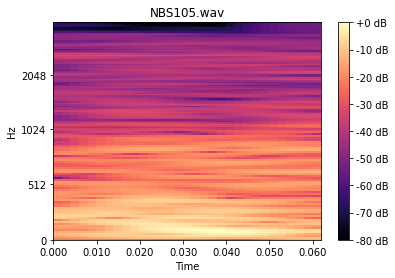

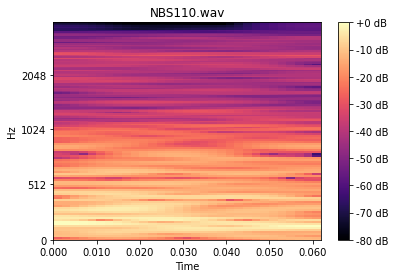

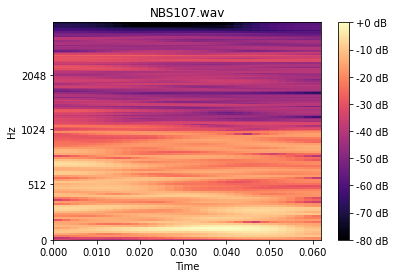

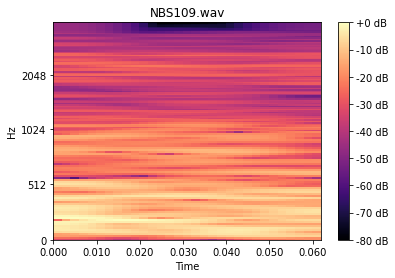

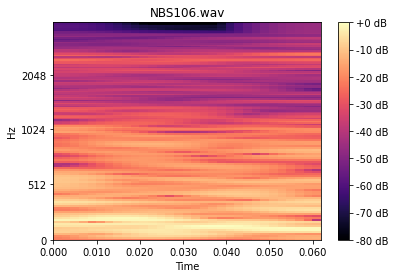

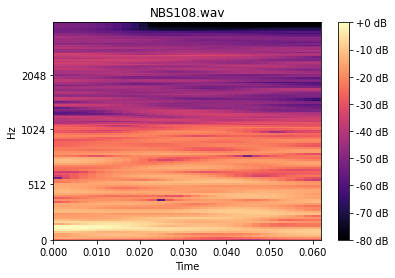

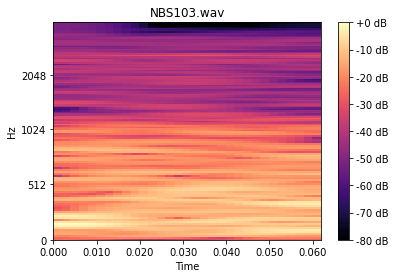

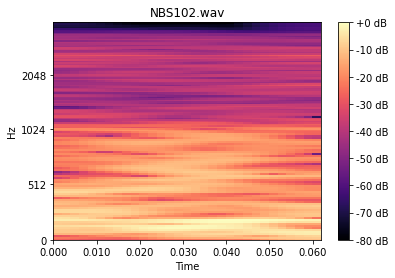

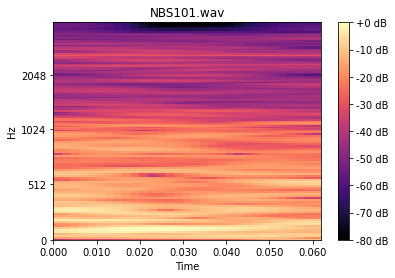

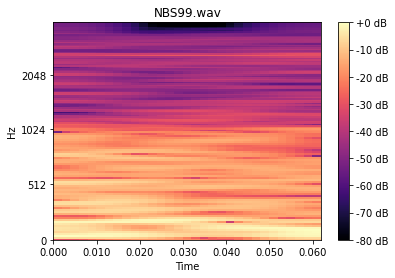

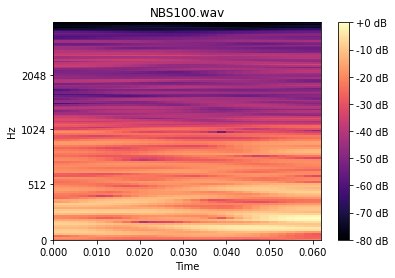

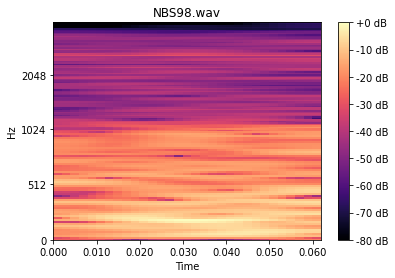

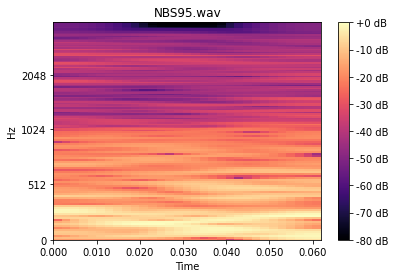

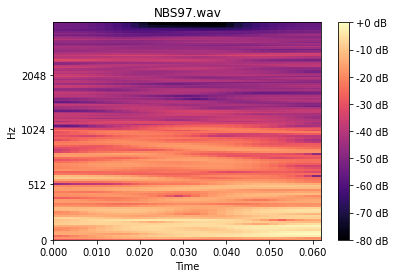

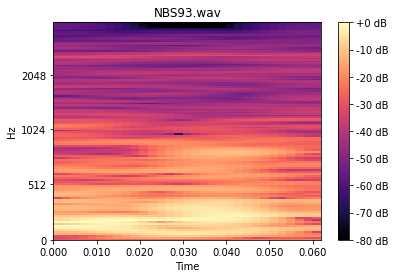

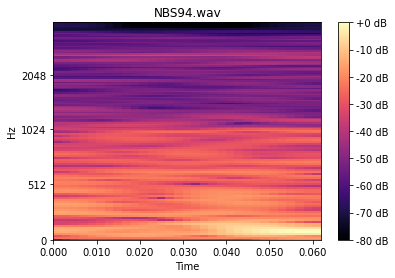

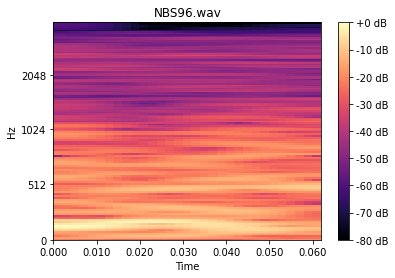

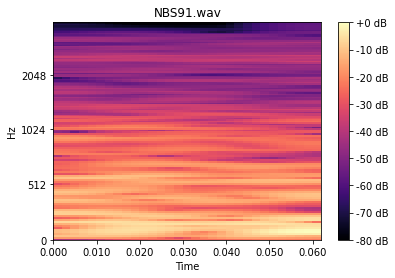

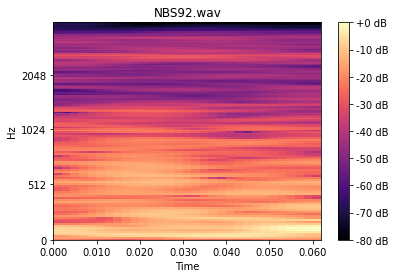

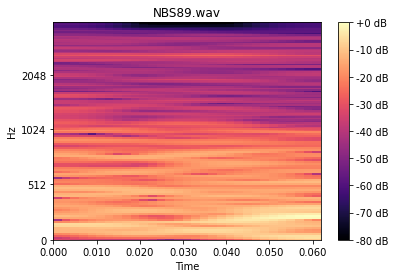

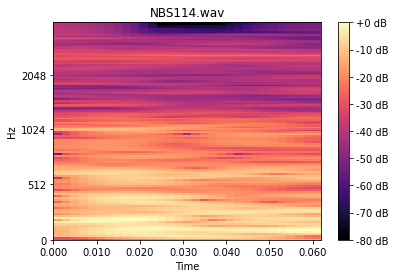

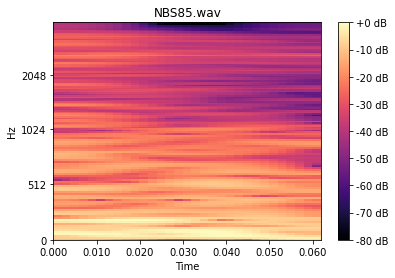

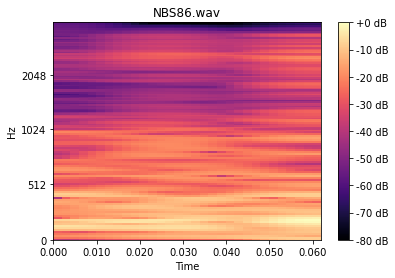

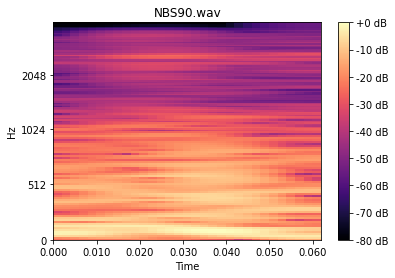

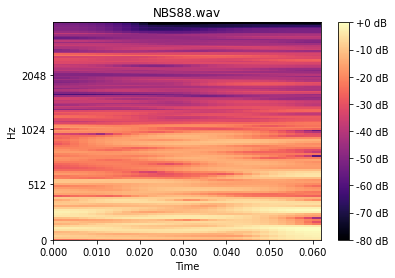

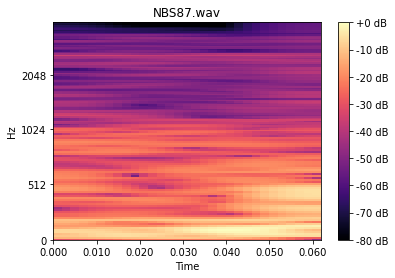

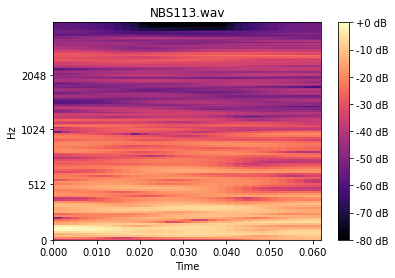

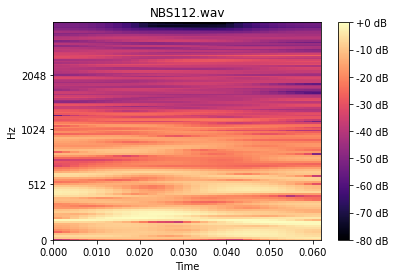

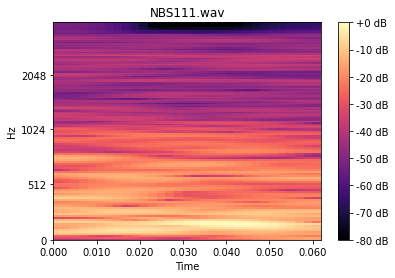

In [306]:
import matplotlib.pyplot as plt
from scipy.signal import normalize,decimate, butter,sosfilt
import scipy
import wave
from scipy.io.wavfile import read
import wavio
i=0
for filename in os.listdir(master_files):
  i+=1
  if filename[0]=='N':
    wav=wavio.read(master_files+'/'+filename)
    sign=wav.data[:,0]
    sr=wav.rate
    sign=scipy.signal.decimate(sign,6)
    sr=8000
    sos=scipy.signal.butter(N=2, Wn=80, btype='high', analog=False, output='sos', fs=sr)
    sos=np.array(sos)
    filtered = sosfilt(sos, sign)
    sign=filtered[:480] #60ms*sr
    sign = sign/(np.max(np.abs(sign))) 
    time = np.linspace(0,len(sign) / sr, num = len(sign))
    #plt.figure(i)
    #plt.plot(time, sign)
    n_fft=400 #50ms*sr
    hop_length=16
    n_mels=128
    S = librosa.feature.melspectrogram(sign, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    S_DB = librosa.power_to_db(S, ref=np.max)
    plt.figure(i)
    librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel');
    plt.colorbar(format='%+2.0f dB');
    plt.title(filename)


Text(0.5, 1.0, 'BS119.wav')

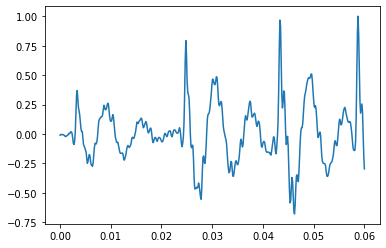

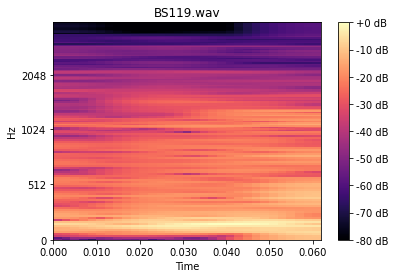

In [307]:
filename='BS119.wav'
wav=wavio.read(test_files+'/'+filename)
sign=wav.data[:,0]
sr=wav.rate
sign=scipy.signal.decimate(sign,6)
sr=8000
sos=scipy.signal.butter(N=2, Wn=80, btype='high', analog=False, output='sos', fs=sr)
sos=np.array(sos)
filtered = sosfilt(sos, sign)
sign=filtered[:480] #60ms*sr
sign = sign/(np.max(np.abs(sign))) 
time = np.linspace(0,len(sign) / sr, num = len(sign))
plt.figure(1)
plt.plot(time, sign)
n_fft=400 #50ms*sr
hop_length=16
n_mels=128
S = librosa.feature.melspectrogram(sign, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
S_DB = librosa.power_to_db(S, ref=np.max)
plt.figure(2)
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');
plt.title(filename)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


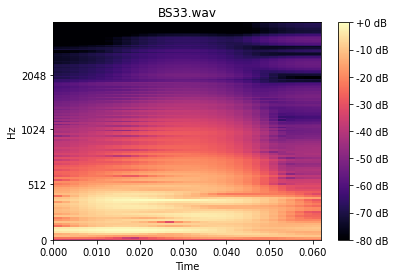

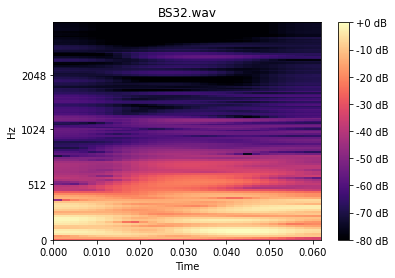

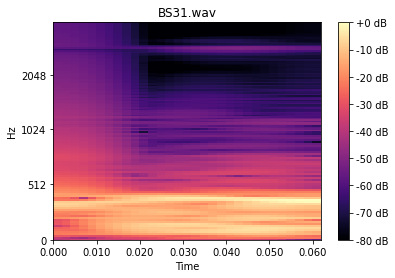

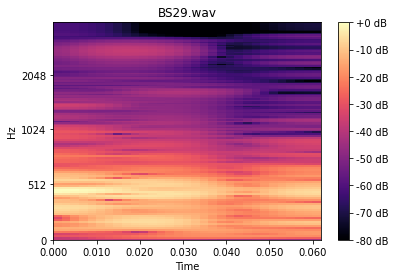

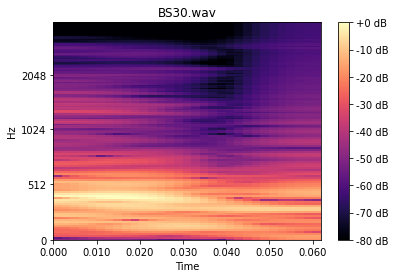

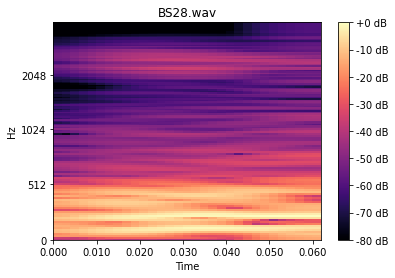

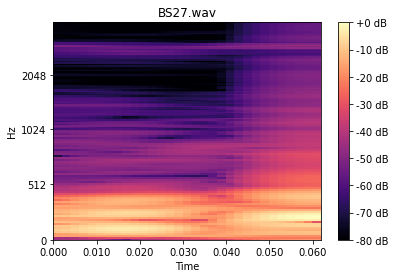

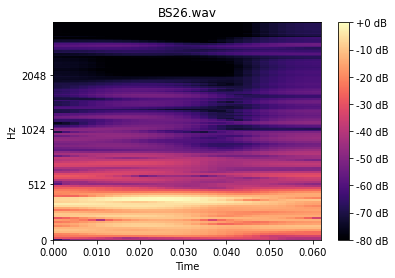

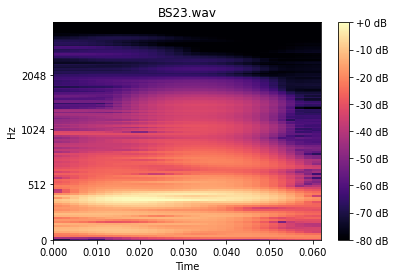

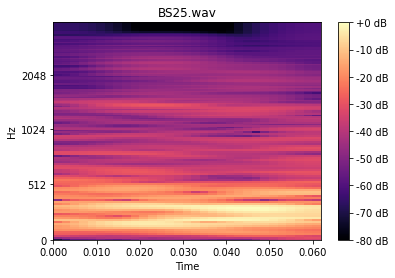

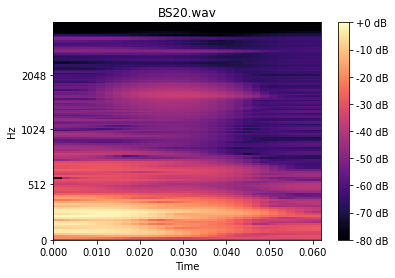

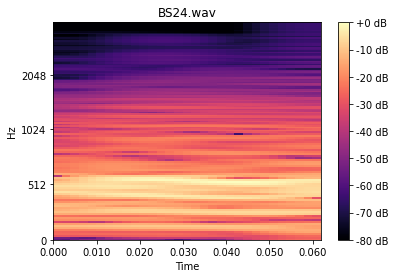

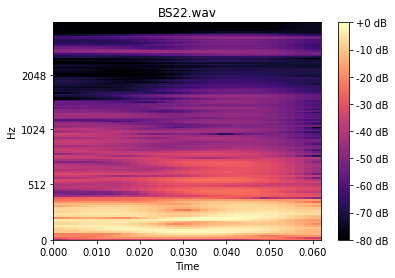

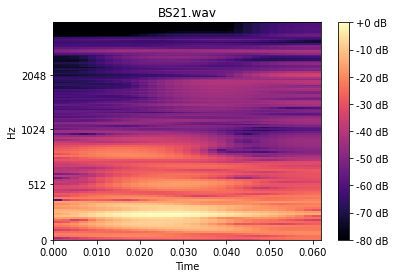

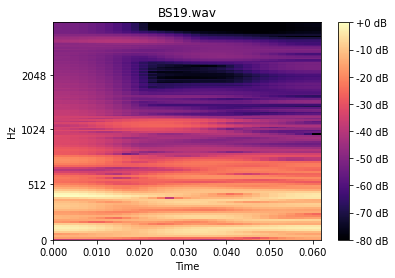

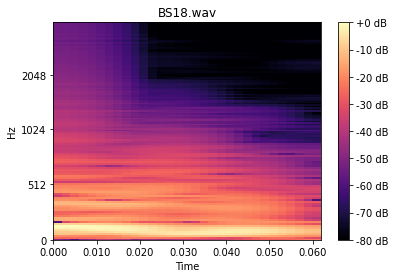

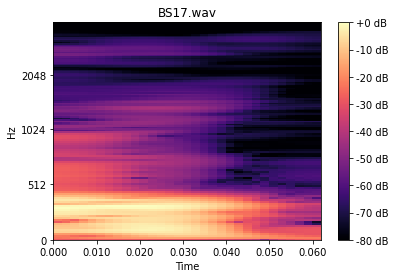

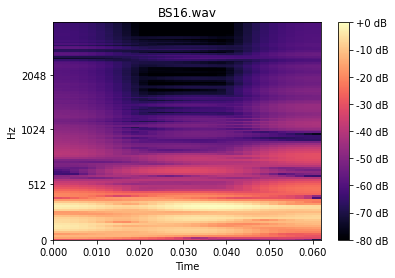

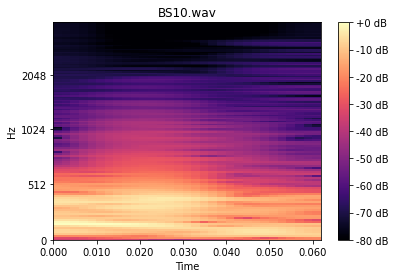

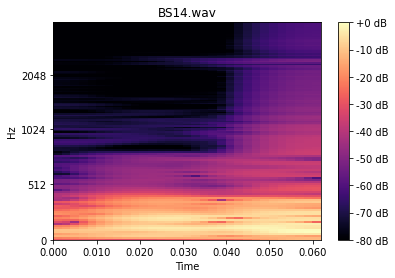

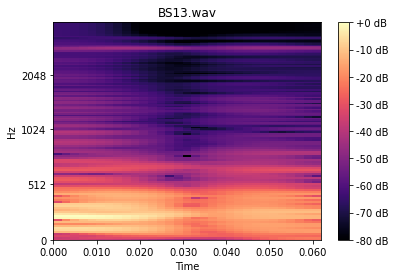

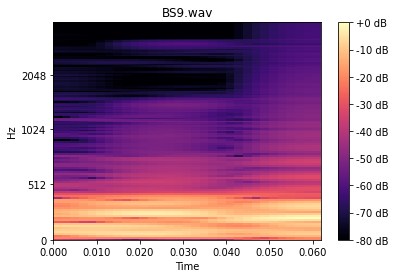

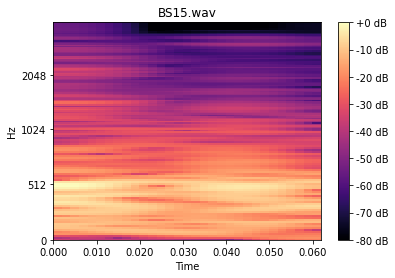

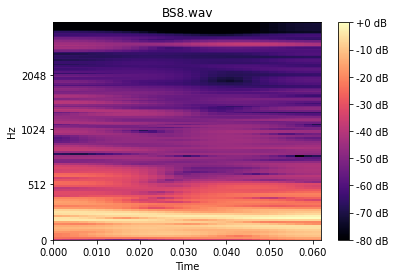

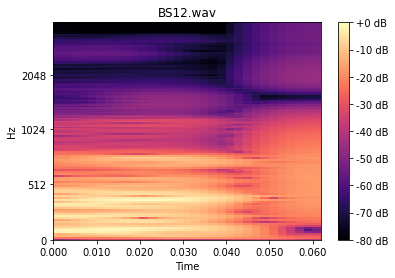

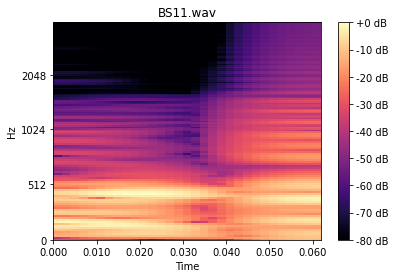

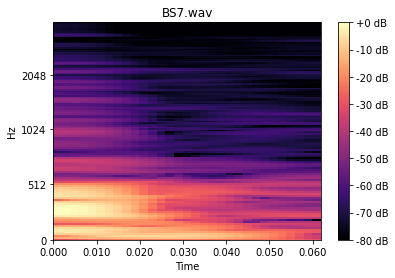

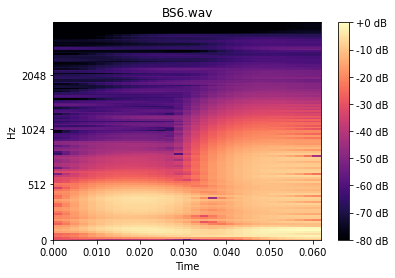

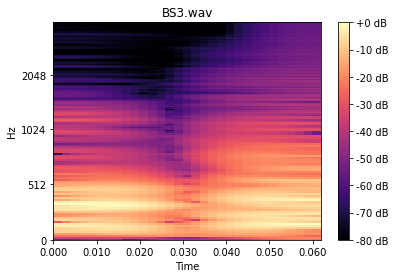

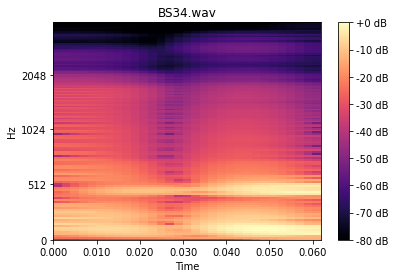

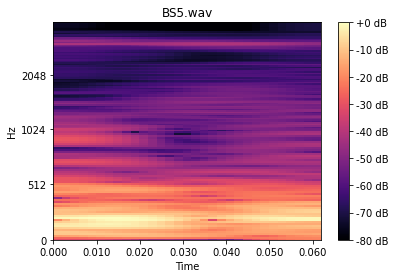

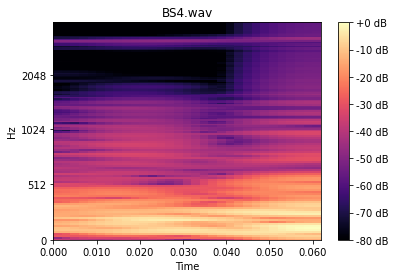

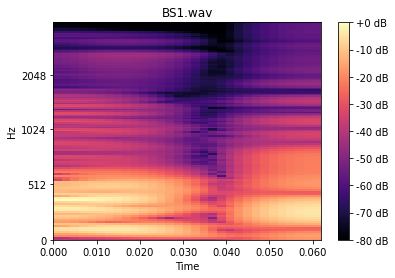

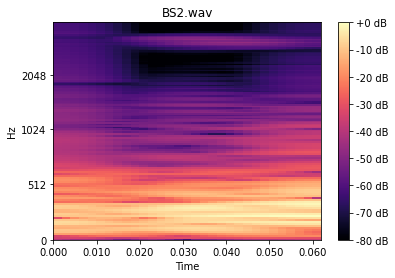

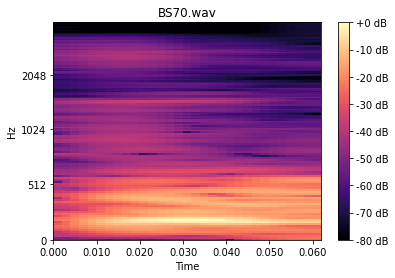

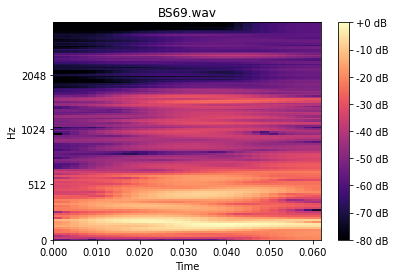

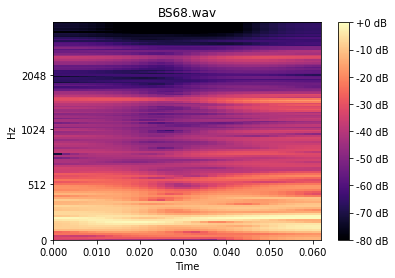

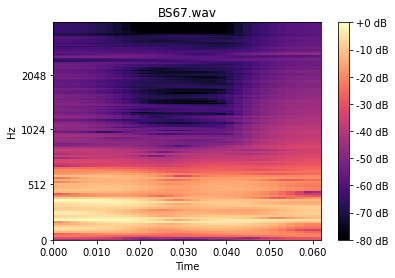

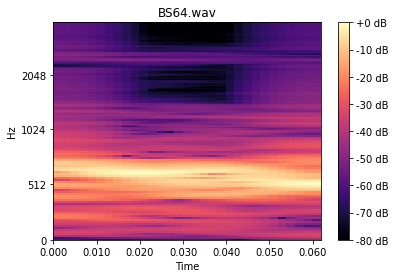

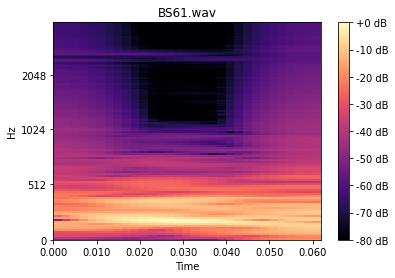

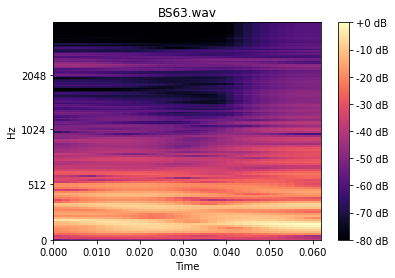

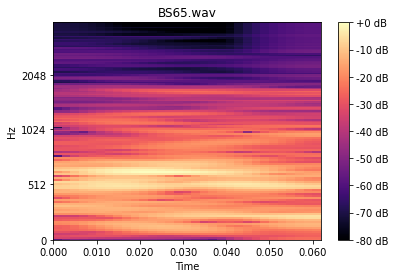

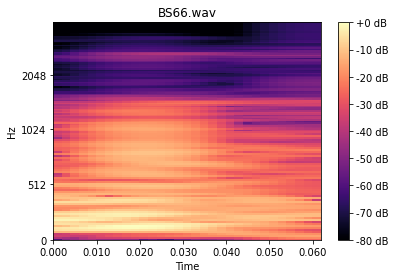

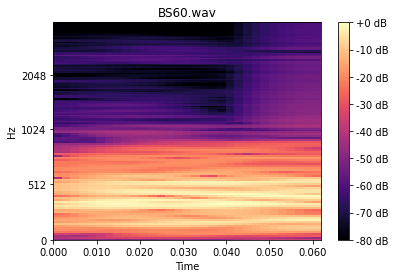

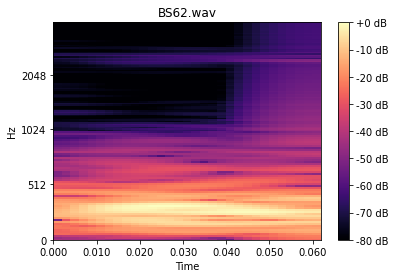

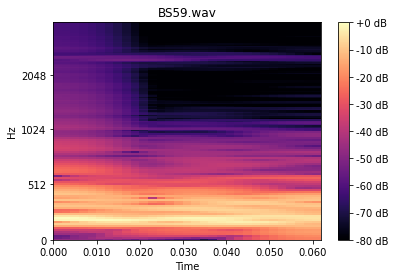

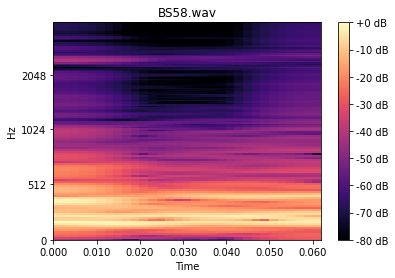

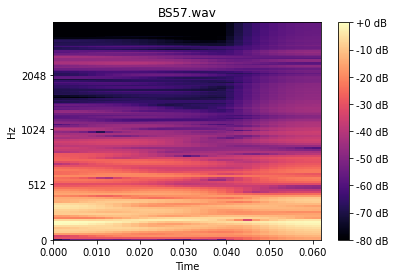

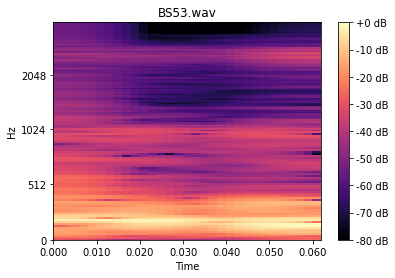

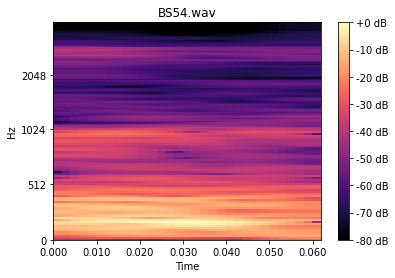

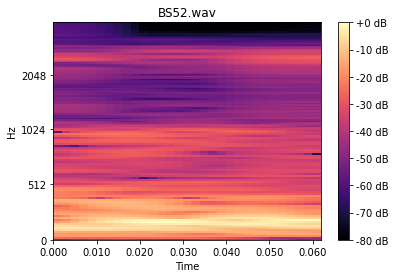

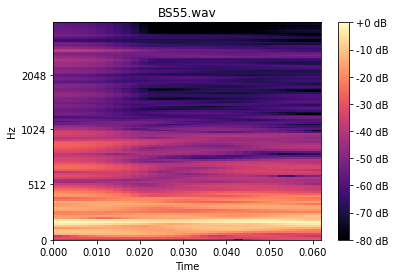

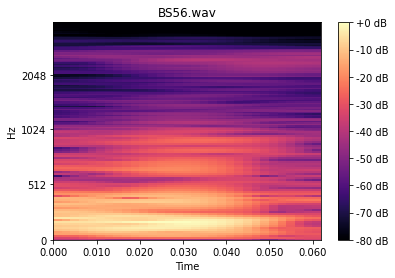

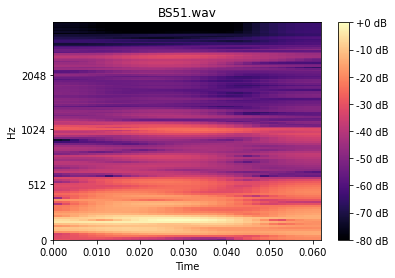

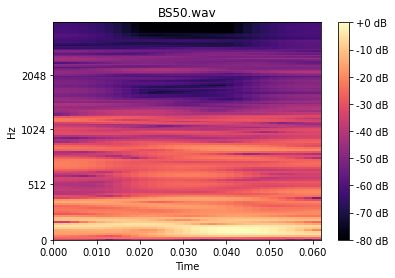

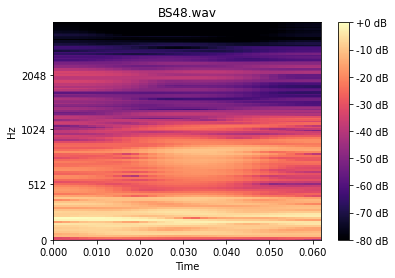

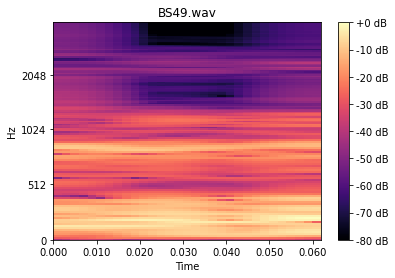

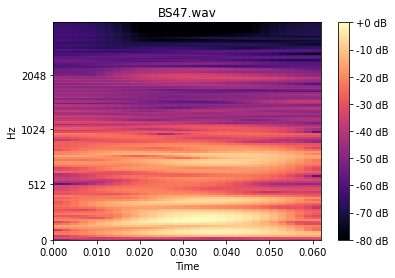

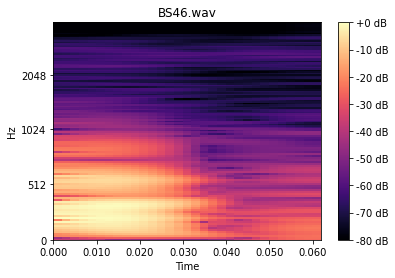

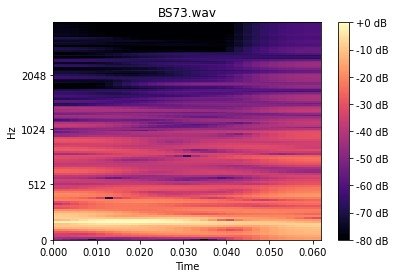

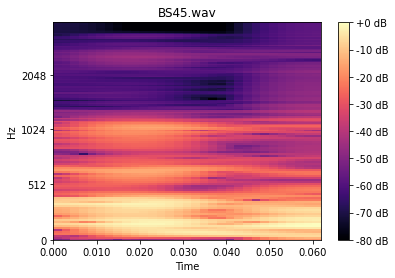

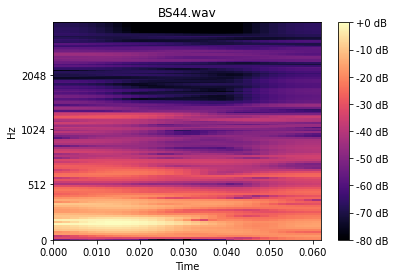

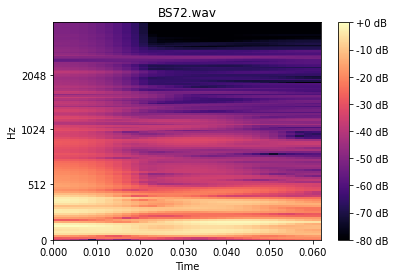

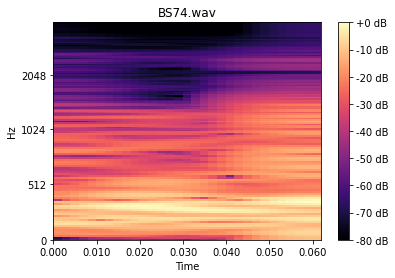

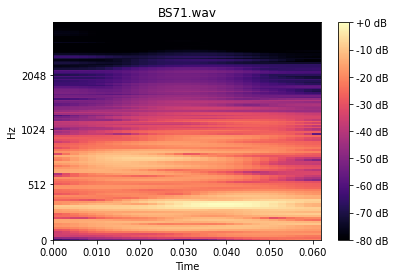

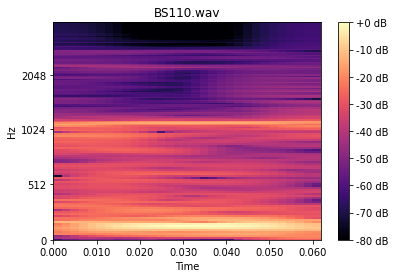

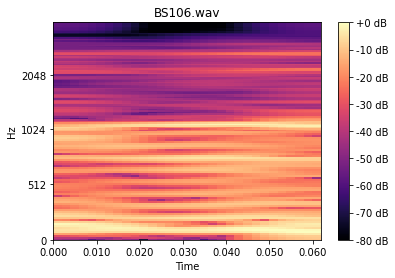

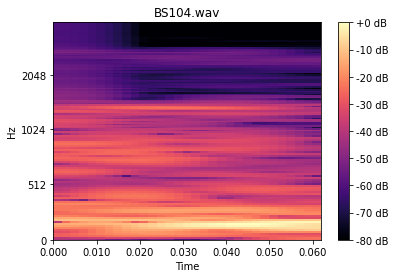

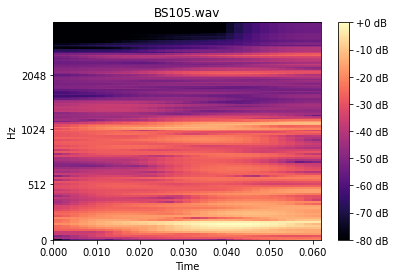

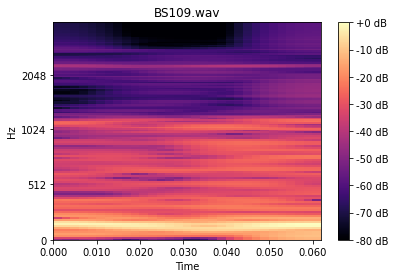

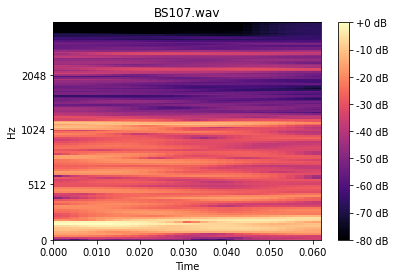

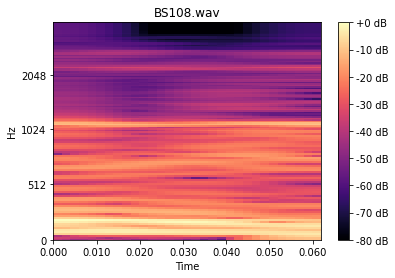

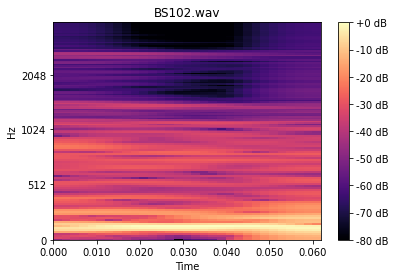

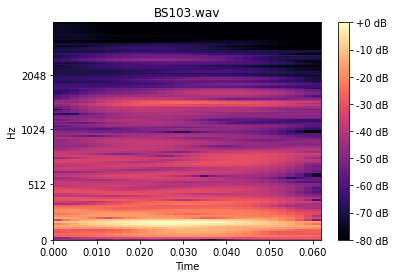

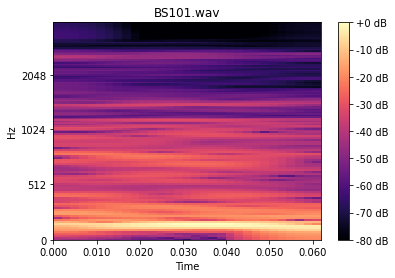

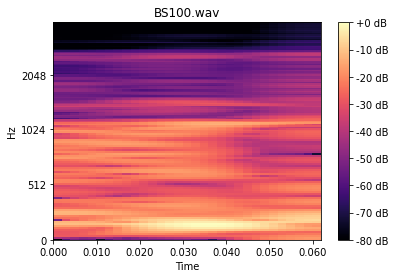

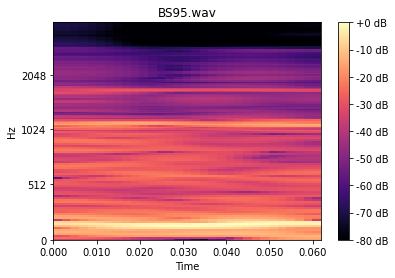

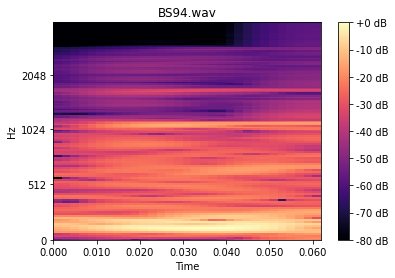

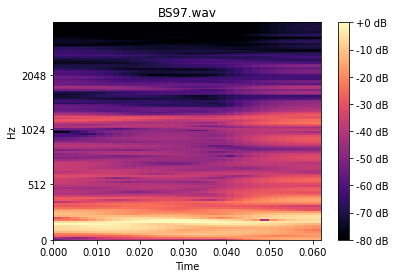

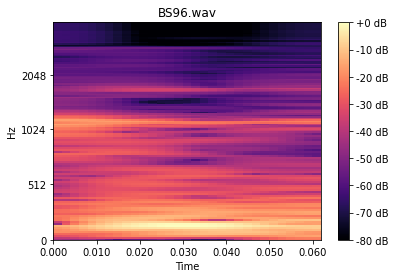

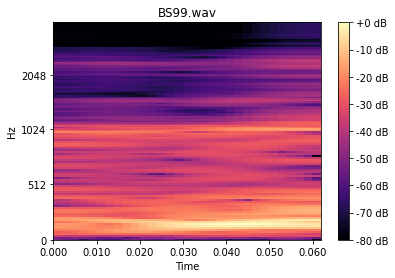

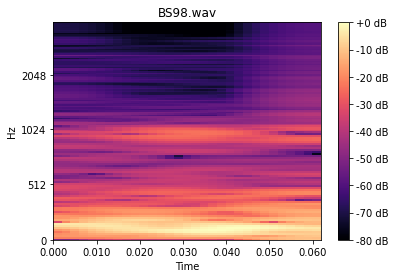

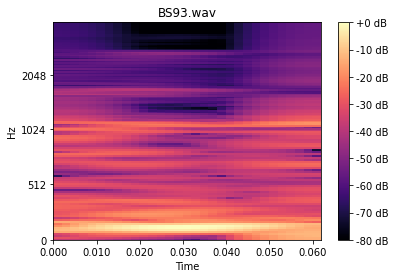

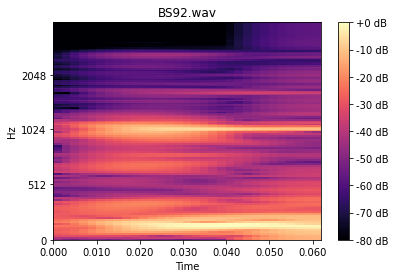

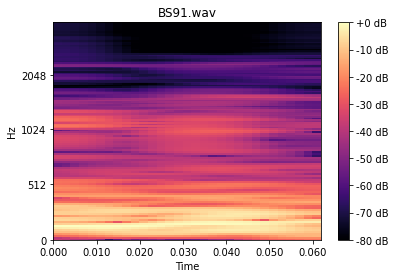

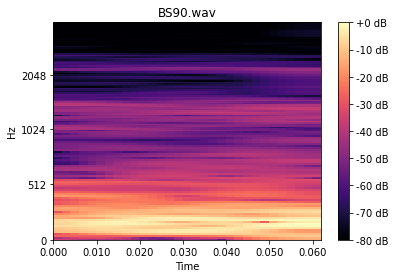

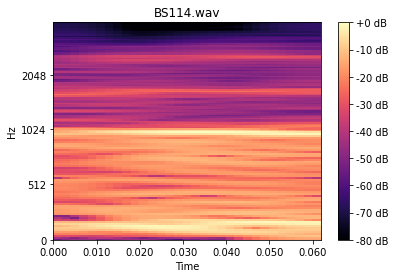

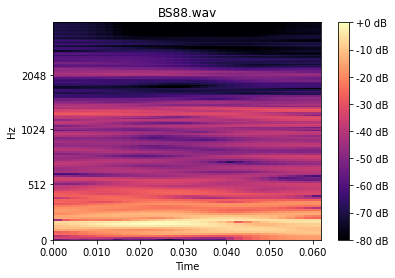

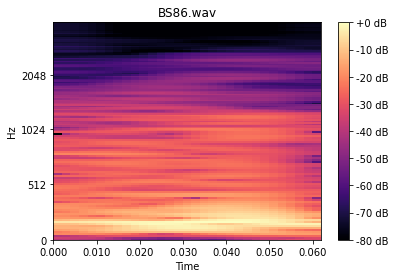

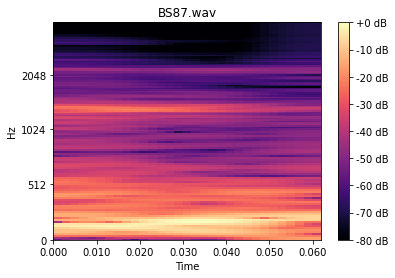

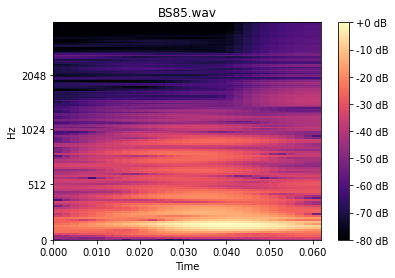

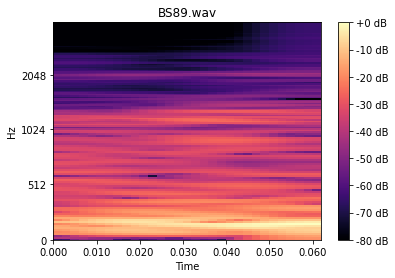

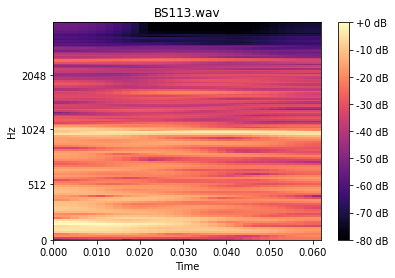

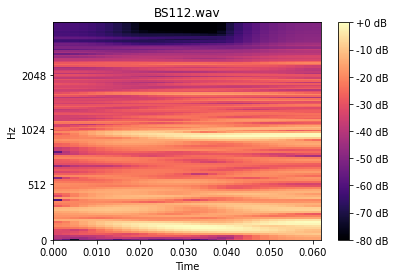

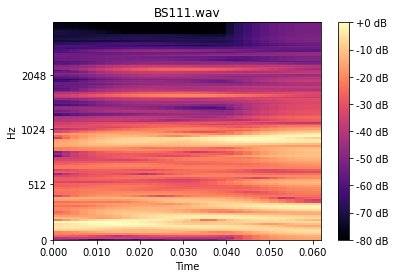

In [308]:
for filename in os.listdir(master_files):
  i+=1
  if filename[0]=='B':
    wav=wavio.read(master_files+'/'+filename)
    sign=wav.data[:,0]
    sr=wav.rate
    sign=scipy.signal.decimate(sign,6)
    sr=8000
    sos=scipy.signal.butter(N=2, Wn=80, btype='high', analog=False, output='sos', fs=sr)
    sos=np.array(sos)
    filtered = sosfilt(sos, sign)
    sign=filtered[:480] #60ms*sr
    sign = sign/(np.max(np.abs(sign))) 
    time = np.linspace(0,len(sign) / sr, num = len(sign))
    #plt.figure(i)
    #plt.plot(time, sign)
    n_fft=400 #50ms*sr
    hop_length=16
    n_mels=128
    S = librosa.feature.melspectrogram(sign, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    S_DB = librosa.power_to_db(S, ref=np.max)
    plt.figure(i)
    librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel');
    plt.colorbar(format='%+2.0f dB');
    plt.title(filename)

(128, 31)
4000


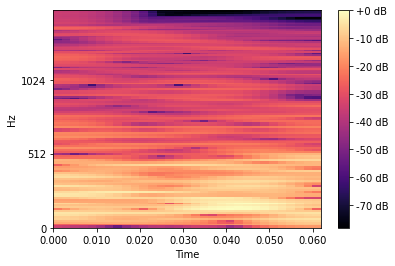

In [9]:
import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt
#sr=4000
n_fft=200 #50ms*sr
hop_length=8
n_mels=128
S = librosa.feature.melspectrogram(sign, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
S_DB = librosa.power_to_db(S, ref=np.max)
print(S_DB.shape)
print(sr)
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');

PREPROCESSING AND FEATURE EXTRACTION

In [ ]:
from scipy.signal import butter
#BS='1' and NBS='0'
labelVector=[]
i=0
feature_matrix=[]
#1 frame = 50ms =sr*50ms samples.
sr=4000
n_fft=400 #50ms*sr
hop_length=16
n_mels=128

for filename in os.listdir(master_files):
  if filename[0]=='B':
    labelVector.append(1)
  else:
    labelVector.append(0)
  wav=wavio.read(master_files+'/'+filename)
  sign=wav.data[:,0]
  sr=wav.rate
  sign=scipy.signal.decimate(sign,6)
  sos=scipy.signal.butter(N=2, Wn=80, btype='high', analog=False, output='sos', fs=sr)
  sos=np.array(sos)
  filtered = sosfilt(sos, sign)
  SIGN=filtered[:480] #sr*60ms
  SIGN = SIGN/(np.max(np.abs(SIGN)))  
  S = librosa.feature.melspectrogram(SIGN, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
  print(S.shape)
  S_DB = librosa.power_to_db(S, ref=np.max)
  feature_matrix.append(S_DB)




In [251]:
print(len(feature_matrix[0][0])) #66x128x3

31


In [252]:
#SPLITTING TO TRAIN AND VALIDATION 
x_train, x_val, y_train, y_val = train_test_split(feature_matrix, labelVector, test_size=0.1,shuffle=True)

In [ ]:
print(x_train)

SCALING

In [253]:
scaler=StandardScaler()
x_train=np.array(x_train)
x_val=np.array(x_val)
y_train=np.array(y_train)
y_val=np.array(y_val)
x_train = scaler.fit_transform(x_train.reshape(-1, x_train.shape[-1])).reshape(x_train.shape)
x_val=scaler.transform(x_val.reshape(-1, x_val.shape[-1])).reshape(x_val.shape)

In [60]:
print(x_val.shape)

(19, 128, 5)


In [23]:
print(len(x_train[0]))

128


TRAINING


Epoch 1/100
6/6 [==============================] - 1s 147ms/step - loss: 1.7277 - accuracy: 0.8070 - val_loss: 0.9886 - val_accuracy: 0.8947
Epoch 2/100
6/6 [==============================] - 1s 112ms/step - loss: 1.7456 - accuracy: 0.8772 - val_loss: 0.3450 - val_accuracy: 0.8947
Epoch 3/100
6/6 [==============================] - 1s 116ms/step - loss: 0.2526 - accuracy: 0.9357 - val_loss: 0.0345 - val_accuracy: 1.0000
Epoch 4/100
6/6 [==============================] - 1s 117ms/step - loss: 0.1040 - accuracy: 0.9532 - val_loss: 0.3104 - val_accuracy: 0.8947
Epoch 5/100
6/6 [==============================] - 1s 115ms/step - loss: 0.1194 - accuracy: 0.9532 - val_loss: 0.0569 - val_accuracy: 1.0000
Epoch 6/100
6/6 [==============================] - 1s 115ms/step - loss: 0.0450 - accuracy: 0.9825 - val_loss: 0.2226 - val_accuracy: 0.9474
Epoch 7/100
6/6 [==============================] - 1s 116ms/step - loss: 0.0388 - accuracy: 0.9825 - val_loss: 0.0214 - val_accuracy: 1.0000
Epoch 8/100
6

<function matplotlib.pyplot.show>

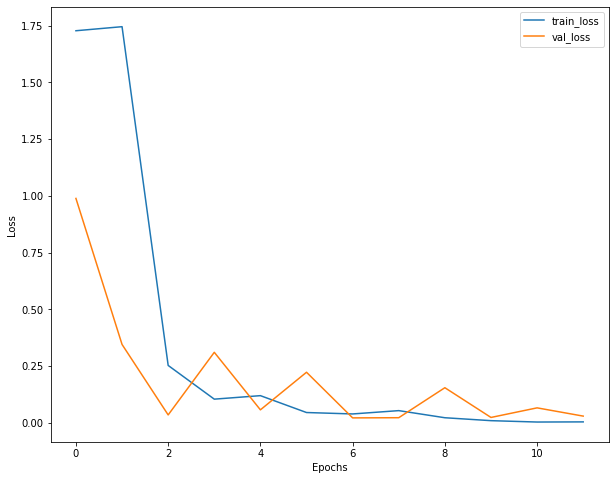

In [281]:
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from keras.layers.advanced_activations import ReLU
import keras
callback = EarlyStopping(monitor='val_loss', patience=5)

num_classes=2
sample_shape = x_train[0].shape #(,100,13)

model_new = Sequential()
model_new.add(Conv2D(8, kernel_size=(3,1), input_shape = (128,31, 1), activation='relu'))

model_new.add(MaxPooling2D((2,1)))

model_new.add(Conv2D(8, kernel_size=(3,1), activation='relu'))

model_new.add(Conv2D(32, kernel_size=(3,3), activation='relu'))

model_new.add(Dropout(0.1))
model_new.add(Flatten())
model_new.add(Dense(64))
model_new.add(Dense(num_classes-1, activation='sigmoid'))

model_new.compile(loss=keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])


fit_mo = model_new.fit( x_train, y_train,validation_data=(x_val,y_val), epochs=100, batch_size=32, verbose=1, callbacks=[callback])
plt.figure(figsize = (10, 8))
plt.plot(fit_mo.history['loss'], label = 'train_loss')
plt.plot(fit_mo.history['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid
plt.legend()
plt.show








TESTING THE MODEL FROM GOOD DATA SET

In [ ]:
test_files='/content/drive/MyDrive/Colab Notebooks/MASTERTHESIS/testfiles'
labelVector_test=[]
i=0
numcep =13
feature_matrix_test=[]
#1 frame = 50ms =200 samples. 50ms skal deles inn i 2048 samples. 5ms er da 204.8. 
n_fft=400 #50ms*sr
hop_length=16
n_mels=128
filename_vector=[]

for filename in os.listdir(test_files):
  print(filename)
  filename_vector.append(filename)
  if filename[0]=='B':
    labelVector_test.append(1)
  else:
    labelVector_test.append(0)
  #signal,sr=librosa.load(test_files+'/'+filename,sr)
  wav=wavio.read(test_files+'/'+filename)
  sign=wav.data[:,0]
  sr=wav.rate
  signal=scipy.signal.decimate(sign,6)
  sr=8000
  #print(signal[0:5])
  sos=scipy.signal.butter(N=2, Wn=80, btype='high', analog=False, output='sos', fs=sr)
  sos=np.array(sos)
  filtered = sosfilt(sos, signal)
  SIGN=filtered[:480] #sr*60ms
  SIGN = SIGN/(np.max(np.abs(SIGN)))
  S = librosa.feature.melspectrogram(SIGN, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
  #print(S[1][:])
  S_DB = librosa.power_to_db(S, ref=np.max)
  feature_matrix_test.append(S_DB)

In [291]:
#feature_matrix_test.shape
feature_matrix_test=np.array(feature_matrix_test)
filename_vector=np.array(filename_vector)

In [292]:
feature_matrix_test=scaler.transform(feature_matrix_test.reshape(-1, feature_matrix_test.shape[-1])).reshape(feature_matrix_test.shape)

In [293]:
predict_x=model_new.predict(feature_matrix_test) 
y_pred = (predict_x > 0.5)

In [294]:
from sklearn.metrics import classification_report
targets = ['NBS', 'BS']
class_reportt = classification_report(y_pred, labelVector_test, 
                                     target_names = targets)

              precision    recall  f1-score   support

         NBS       1.00      0.97      0.98        29
          BS       0.97      1.00      0.98        29

    accuracy                           0.98        58
   macro avg       0.98      0.98      0.98        58
weighted avg       0.98      0.98      0.98        58



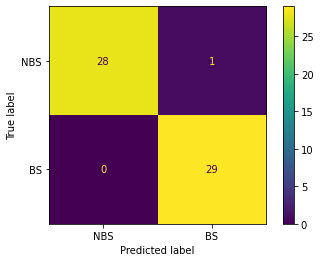

In [295]:
from sklearn.metrics import mean_squared_error,confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay
cm_cnn = confusion_matrix(labelVector_test, y_pred)
conf_matrix = confusion_matrix(labelVector_test, y_pred)
print(classification_report(labelVector_test,y_pred,target_names=targets))
print(ConfusionMatrixDisplay(cm_cnn,display_labels=targets).plot(values_format='.0f'))

In [296]:
#print(y_pred)
s=0
for i in range(len(y_pred)):
  #print(filename_vector[i])
  if filename_vector[i][0]=='N' and y_pred[i]==True:
    s+=1
    print(filename_vector[i])



NBS41.wav


TESTING WITH NOISY DATA 

In [ ]:
noisy_Recording='/content/drive/MyDrive/Colab Notebooks/MASTERTHESIS/subject1-3/sub2/04-211008_1412.wav'
#dividing it to 60 ms segments
#sampl_noisy,signal=scipy.io.wavfile.read(noisy_Recording+'new.wav')
wav=wavio.read(noisy_Recording+'new.wav')
sr=wav.rate
signal=wav.data[:,0]
signal=scipy.signal.decimate(signal,6)
sampl_noisy=8000
length_rec_sec=len(signal)/sampl_noisy
seg=0.06
quant=int(length_rec_sec/seg)
print(quant)
samples_seg=seg*sampl_noisy
mat_seg=[0]*int(samples_seg) #one row containing 60 ms in samples 
for i in range(int(quant/2)):
  v=signal[i*int(samples_seg):(i+1)*int(samples_seg)]
  print(len(v)/sampl_noisy)
  print(i,'of',int(quant/2))
  mat_seg=np.vstack((mat_seg,v))
  print(v.shape)




In [323]:
mat_seg=mat_seg[1:][:]

In [ ]:
print(mat_seg.shape) #34274*60ms=2056=34min
print(hop_length)
line1=mat_seg[0][:]
print(line1)

In [ ]:
feature_matrix_test_noisy=[]
for line in mat_seg:
  sos=scipy.signal.butter(N=2, Wn=80, btype='high', analog=False, output='sos', fs=sr)
  sos=np.array(sos)
  filtered = sosfilt(sos, line)
  SIGN = filtered/(np.max(np.abs(filtered)))  
  S = librosa.feature.melspectrogram(SIGN, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
  print(S.shape)
  S_DB = librosa.power_to_db(S, ref=np.max)
  feature_matrix_test_noisy.append(S_DB)

In [331]:
feature_matrix_test_noisy=np.array(feature_matrix_test_noisy)
print(feature_matrix_test_noisy.shape)
feature_matrix_test_noisy=scaler.transform(feature_matrix_test_noisy.reshape(-1, feature_matrix_test_noisy.shape[-1])).reshape(feature_matrix_test_noisy.shape)
predict_x_noisy=model_new.predict(feature_matrix_test_noisy) 
y_pred = (predict_x_noisy > 0.5)


(35264, 128, 31)


In [ ]:
første50=y_pred[:50]

In [350]:
i=0
antall_BS=0
for line in første50:
  if line==False:
    print('NBS')
    #print(i)
    antall_BS+=1
  i+=1
print(i)

50


In [356]:
i=0
antall_BS=0
for line in y_pred:
  if line==False:
    print('NBS')
    print(i)
    antall_BS+=1
  i+=1
#print(antall_BS)

NBS
319
NBS
381
NBS
558
NBS
595
NBS
656
NBS
670
NBS
690
NBS
721
NBS
852
NBS
1070
NBS
1115
NBS
1271
NBS
1292
NBS
1306
NBS
1307
NBS
1464
NBS
1511
NBS
1526
NBS
1541
NBS
1542
NBS
1635
NBS
1668
NBS
1701
NBS
1745
NBS
1755
NBS
1765
NBS
1780
NBS
1811
NBS
1826
NBS
1855
NBS
1861
NBS
1908
NBS
1922
NBS
1923
NBS
1955
NBS
2016
NBS
2046
NBS
2076
NBS
2091
NBS
2159
NBS
2327
NBS
2450
NBS
2497
NBS
2544
NBS
2619
NBS
2627
NBS
2741
NBS
2758
NBS
2907
NBS
2936
NBS
2964
NBS
3107
NBS
3140
NBS
3287
NBS
3328
NBS
3347
NBS
3361
NBS
3377
NBS
3452
NBS
3454
NBS
3562
NBS
3980
NBS
3993
NBS
4292
NBS
4323
NBS
4339
NBS
4415
NBS
4523
NBS
4524
NBS
4538
NBS
4611
NBS
4631
NBS
4632
NBS
4676
NBS
4702
NBS
4783
NBS
4784
NBS
4905
NBS
4949
NBS
4952
NBS
5213
NBS
5262
NBS
5573
NBS
5642
NBS
5669
NBS
5790
NBS
5894
NBS
5910
NBS
5923
NBS
6031
NBS
6063
NBS
6130
NBS
6281
NBS
6473
NBS
6777
NBS
6866
NBS
6907
NBS
6988
NBS
7036
NBS
7094
NBS
7099
NBS
7330
NBS
7606
NBS
7826
NBS
7976
NBS
8017
NBS
8023
NBS
8202
NBS
8247
NBS
8438
NBS
8524
NBS
8610
N

In [337]:
print(antall_BS)

34927


(128, 31)


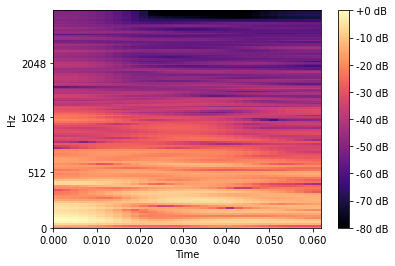

In [371]:
sr=8000
sos=scipy.signal.butter(N=2, Wn=80, btype='high', analog=False, output='sos', fs=sr)
sos=np.array(sos)
filtered = sosfilt(sos, mat_seg[1])
SIGN = filtered/(np.max(np.abs(filtered)))  
S = librosa.feature.melspectrogram(SIGN, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
print(S.shape)
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');

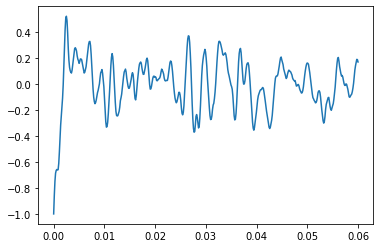

In [372]:
time = np.linspace(0,len(SIGN) / sr, num = len(SIGN))
plt.figure(1)
plt.plot(time, SIGN)